# Análisis del riesgo de incumplimiento de los prestatarios por *Carlos Horta* (carlosgim@gmail.com)

---

Este proyecto consiste en preparar y presentar un informe para la división de préstamos del banco. También se debatirá si las variables estado civil y número de hijos de un cliente tienen un impacto en el incumplimiento de pago de un préstamo. Dentro del dataframe inicial se encuentran algunos datos sobre la solvencia crediticia de los clientes.

Como objetivo general de este trabajo está apoyar en crear una **puntuación de crédito** para un cliente potencial. La **puntuación de crédito** se utilizará para evaluar la capacidad de un prestatario potencial para pagar su préstamo.

Asimismo, este trabajo buscará responder las siguientes 4 preguntas:
- ¿Hay alguna conexión entre tener hijos y pagar un préstamo a tiempo?
- ¿Existe una conexión entre el estado civil y el pago a tiempo de un préstamo?
- ¿Existe una conexión entre el nivel de ingresos y el pago a tiempo de un préstamo?
- ¿Cómo afectan los diferentes propósitos del préstamo al reembolso a tiempo del préstamo?

Este proyecto preprocesará los datos de la siguiente manera:
- Se buscarán y trabajarán con los valores ausentes y duplicados tanto de las variables categóricas como cuantitativas.
- Se cambiarán los tipos de datos, por ejemplo, convertir cadenas en números.
- Se clasificarán los tipos de datos.
- Y por último, se tratará de responder las cuatro preguntas planteadas arriba con el fin de crear una puntuación de crédito.
------------------------------------------------------------------------------------------------------------------------------------

# Project Description

This project involves preparing and presenting a report for the loan division of the bank. It will also discuss whether variables such as marital status and number of children have an impact on loan default. The initial dataframe contains some data on the creditworthiness of the clients.

## General Objective

The general objective of this work is to assist in creating a **credit score** for a potential client. The credit score will be used to evaluate the ability of a potential borrower to repay their loan.

## Key Questions

This project seeks to answer the following four questions:

1. Is there any connection between having children and timely loan repayment?
2. Is there a connection between marital status and timely loan repayment?
3. Is there a connection between income level and timely loan repayment?
4. How do different loan purposes affect timely loan repayment?

## Data Preprocessing Steps

This project will preprocess the data in the following ways:

- Identify and handle missing and duplicate values for both categorical and quantitative variables.
- Convert data types, such as converting strings into numbers.
- Classify data types.
- Attempt to answer the four questions mentioned above in order to create a credit score.




# Inicio de la exploración de datos.

A continuación, se cargarán las librerías **pandas**, **matplotlib** y **missingno** que se utilizarán para este proyecto de Python. 

Así mismo, el archivo csv con el dataframe se cargará de dos maneras diferentes para asegurar su funcionamiento en varios sistemas operativos y plataformas.

In [1]:
# Se cargan todas las librerías

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

In [2]:
# Como se utiliza missingo dentro del proyecto, se escribe su comando para la instalación respectiva

!pip install missingno 

import missingno as msno

In [3]:

# Carga los datos
try:
    credit_scoring = pd.read_csv("credit_scoring_eng.csv")
except:
    credit_scoring = pd.read_csv("/datasets/credit_scoring_eng.csv")


## Parte 1. Exploración de datos

El dataframe de este trabajo está guardado con el nombre de la variable **credit_scoring** y contiene las siguientes 12 columnas:  

- `children` - el número de hijos en la familia
- `days_employed` - experiencia laboral en días
- `dob_years` - la edad del cliente en años
- `education` - la educación del cliente
- `education_id` - identificador de educación
- `family_status` - estado civil
- `family_status_id` - identificador de estado civil
- `gender` - género del cliente
- `income_type` - tipo de empleo
- `debt` - ¿había alguna deuda en el pago de un préstamo?
- `total_income` - ingreso mensual
- `purpose` - el propósito de obtener un préstamo

In [4]:
# Con el siguiente método se puede observar cuántas filas y columnas tiene el conjunto de datos
credit_scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [5]:
# Con el método head() se puede observar las primeras filas del conjunto de datos
credit_scoring.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


En una revisión rápida de la tabla, centrándonos únicamente en las primeras 20 filas, se pueden observar los siguientes puntos:

- Hay un total de 12 columnas de datos. Nueve de ellas tienen 21,525 registros cada una, mientras que dos columnas (days_employed y total_income) tienen 19,351 registros, lo que implica 2,174 valores faltantes.

- Los datos en la columna **days_employed** están en negativo en todos los casos, excepto cuando la fila corresponde a una persona jubilada (retiree) o viuda (widow/widower).

- La columna **education** contiene datos escritos tanto en mayúsculas como en minúsculas, mientras que el resto de las columnas parecen estar en minúsculas.

- Existe una posible relación entre las columnas **days_employed** y **total_income**, ya que ambas tienen el mismo número de datos disponibles. Esto sugiere que si una persona no tiene empleo, es probable que tampoco tenga ingresos.

- No se proporciona un identificador único para cada cliente en la tabla. Asumimos que cada fila representa a un cliente único, aunque es posible que un cliente solicite diferentes créditos para diversos propósitos.

In [6]:
# Obtener información sobre los datos
credit_scoring.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Tal y como se pudo observar anteriormente, existen 2,174 valores nulos en las columnas days_employed y total_income, por lo tanto podríamos continuar con la suposición de la relación de ambas columnas: si no hay empleo actual no hay ingreso. 

Importante, una persona retirada con empleo actual sí tiene un valor asignado en total_income, por lo que la suposición de arriba se ve plausible: si no tienes un registro en empleo actual entonces no tienes ingresos.

In [7]:
# Con describe(all) podremos revisar la totalida de las columnas de las tablas
credit_scoring.describe(include='all')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
count,21525.000000,19351.000000,21525.000000,21525,21525.000000,21525,21525.000000,21525,21525,21525.000000,19351.000000,21525
unique,NaN,NaN,NaN,15,NaN,5,NaN,3,8,NaN,NaN,38
top,NaN,NaN,NaN,secondary education,NaN,married,NaN,F,employee,NaN,NaN,wedding ceremony
freq,NaN,NaN,NaN,13750,NaN,12380,NaN,14236,11119,NaN,NaN,797
mean,0.538908,63046.497661,43.293380,NaN,0.817236,NaN,0.972544,NaN,NaN,0.080883,26787.568355,NaN
std,1.381587,140827.311974,12.574584,NaN,0.548138,NaN,1.420324,NaN,NaN,0.272661,16475.450632,NaN
min,-1.000000,-18388.949901,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,0.000000,3306.762000,NaN
25%,0.000000,-2747.423625,33.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,16488.504500,NaN
50%,0.000000,-1203.369529,42.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,23202.870000,NaN
75%,1.000000,-291.095954,53.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000,32549.611000,NaN


In [8]:
#Estos son el número de elementos únicos de cada columna.
credit_scoring.nunique()

children                8
days_employed       19351
dob_years              58
education              15
education_id            5
family_status           5
family_status_id        5
gender                  3
income_type             8
debt                    2
total_income        19348
purpose                38
dtype: int64

Asimismo, al identificar los valores únicos por columna y complementar con el resumen estadístico de las columnas numéricas, se pueden observar las siguientes características:

- **children**: existen 8 valores únicos, pero uno de ellos es un -1, lo cual sugiere un error de captura. Además, se observa que el valor máximo es 20, lo que indica un posible error de dedo o la presencia de clientes con un número inusualmente alto de hijos.

- **days_employed**: además de los datos faltantes, se encuentran valores tanto negativos como positivos, lo cual puede ser indicativo de errores de captura.

- **dob_years**: existen 58 valores únicos para representar la edad del cliente, pero uno de ellos es 0, lo que requiere una revisión adicional.

- **education_id**: existen 5 posibles opciones de respuesta, pero la columna "education" tiene 15 valores únicos, lo que sugiere que la escritura del nivel educativo pudo haberse realizado de tres maneras posibles (por ejemplo, "some college", "SOME COLLEGE" y "Some College"). Además, no es posible determinar si los valores de "education_id" se asignaron de manera progresiva (por ejemplo, 0 asignado a nivel primaria y así sucesivamente) o si las asignaciones están en un orden distinto.

- **family_status_id**: existen 5 respuestas únicas que se corresponden con las 5 categorías de "family_status_id". Sin embargo, es necesario confirmar la correspondencia exacta entre ambas columnas (por ejemplo, si "widow" se asigna como 0, 5 u otro número).

- **total_income**: existen 19,351 respuestas, pero solo 19,348 respuestas únicas, lo cual indica que posiblemente 1, 2 o 3 clientes del banco tengan ingresos mensuales similares.

- **income_type**: se presentan 8 posibles respuestas, lo que indica la presencia de diferentes tipos de clientes del banco, como estudiantes, jubilados, desempleados, entre otros.

- **gender**: existen tres respuestas únicas, lo cual sugiere la presencia de mujeres y hombres en la muestra. Es posible que la tercera opción corresponda a un valor no registrado, en lugar de ser una categoría relacionada con identidades de género no binarias o diversas.

- **debt**: existen dos posibles respuestas para indicar si el cliente ha pagado sus créditos anteriores: sí o no. Sin embargo, es necesario confirmar a qué número se asigna cada respuesta.

- **purpose**: existen 38 respuestas únicas en esta columna, las cuales podrían agruparse en categorías más generales como "casa", "auto", "educación", "matrimonio", "enfermedad", entre otras.


En estos siguientes renglones únicamente revisaremos valores ausentes y duplicados de las columnas days_employed y total_income que son las columnas que muestran valores faltantes. 

In [9]:
# Comprobemos de otra manera la ausencia de datos por columna.
credit_scoring.isna().any()

children            False
days_employed        True
dob_years           False
education           False
education_id        False
family_status       False
family_status_id    False
gender              False
income_type         False
debt                False
total_income         True
purpose             False
dtype: bool

In [10]:
# Forma 1 de comprobar valores ausentes
credit_scoring.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Como se observa con el código inmediato anterior, son 2,174 filas donde existen valores ausentes

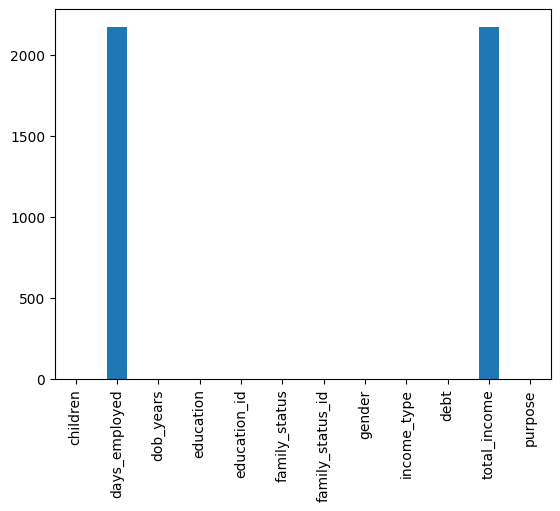

In [11]:
# Con este gráfico podemos ver visualmente los datos faltantes de las columnas del dataframe
credit_scoring.isna().sum().plot(kind='bar')
plt.show()

In [12]:
credit_scoring_nulls = credit_scoring.isnull()

In [13]:
credit_scoring_nulls.sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [14]:
credit_scoring_nulls.mean() * 100

children             0.000000
days_employed       10.099884
dob_years            0.000000
education            0.000000
education_id         0.000000
family_status        0.000000
family_status_id     0.000000
gender               0.000000
income_type          0.000000
debt                 0.000000
total_income        10.099884
purpose              0.000000
dtype: float64

<AxesSubplot: >

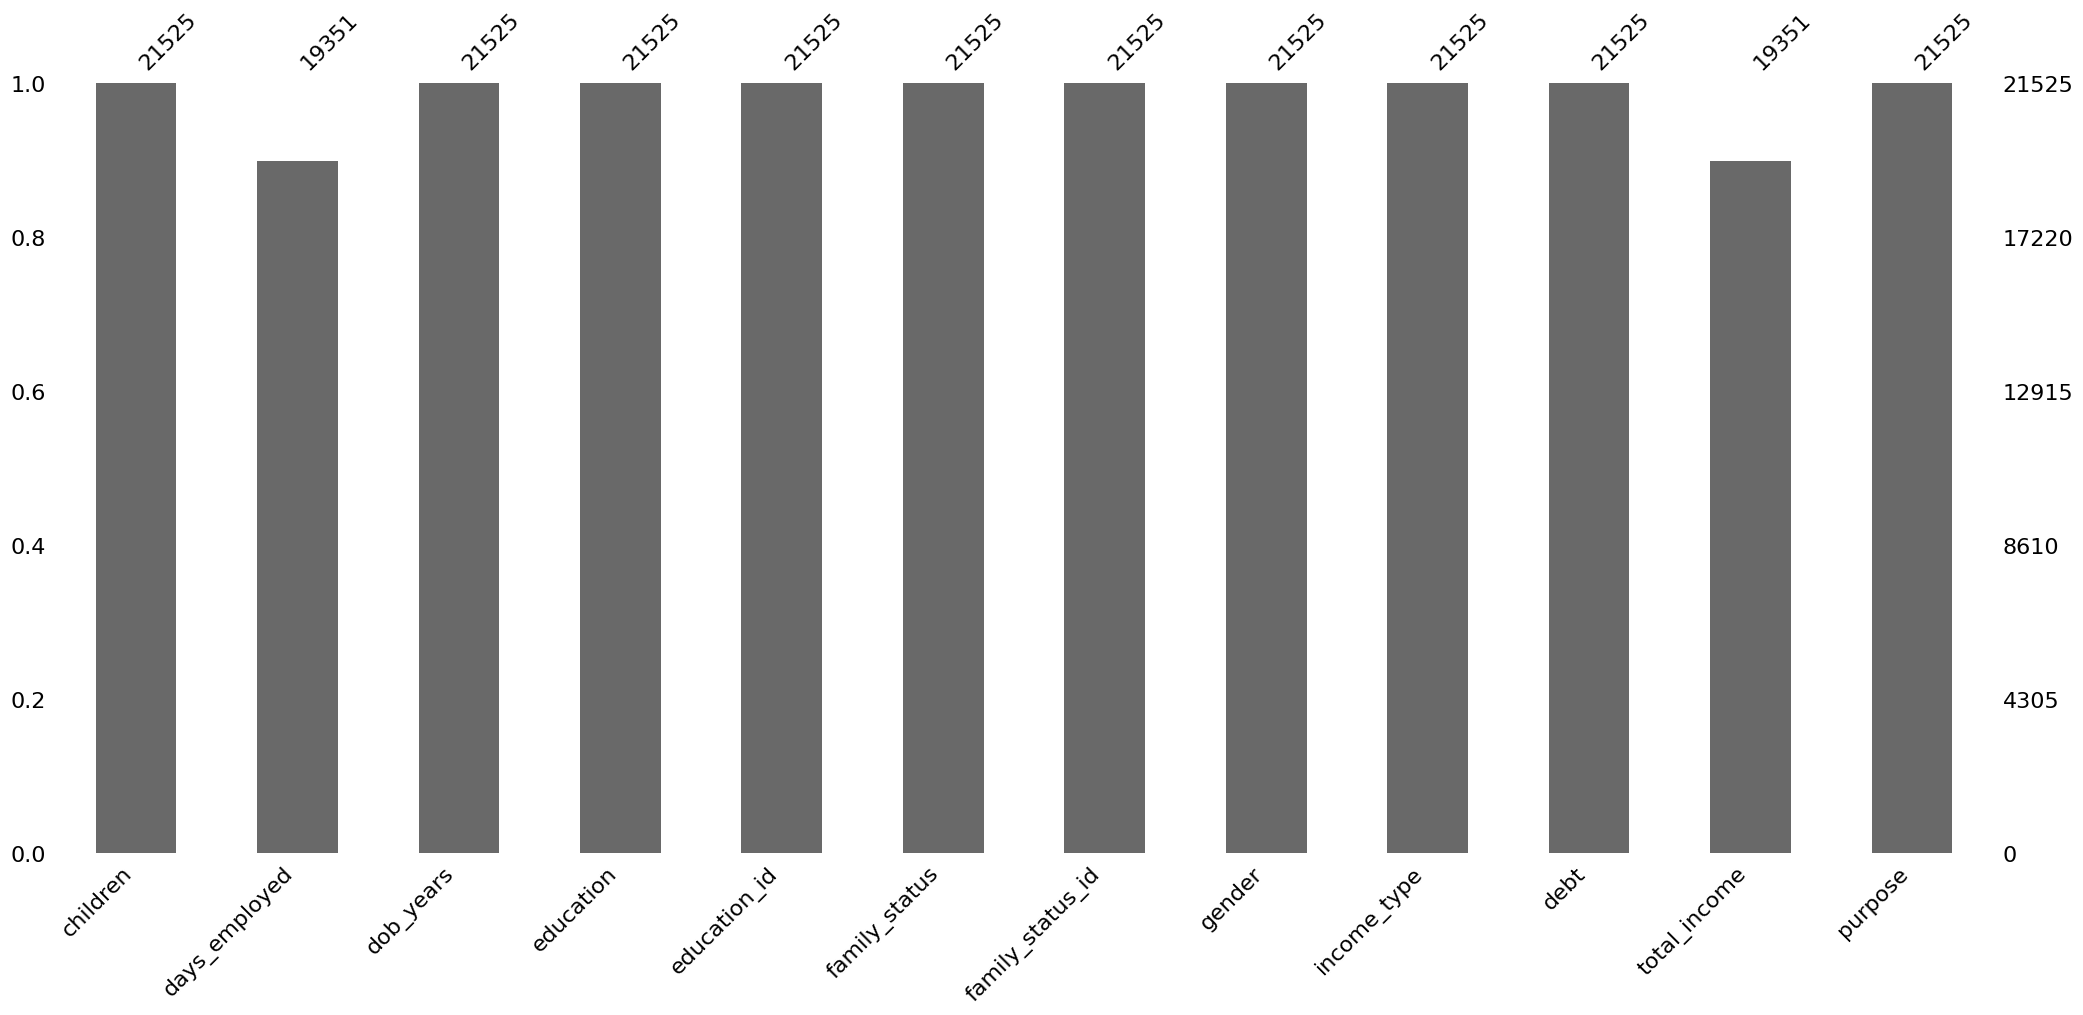

In [15]:
msno.bar(credit_scoring)

<AxesSubplot: >

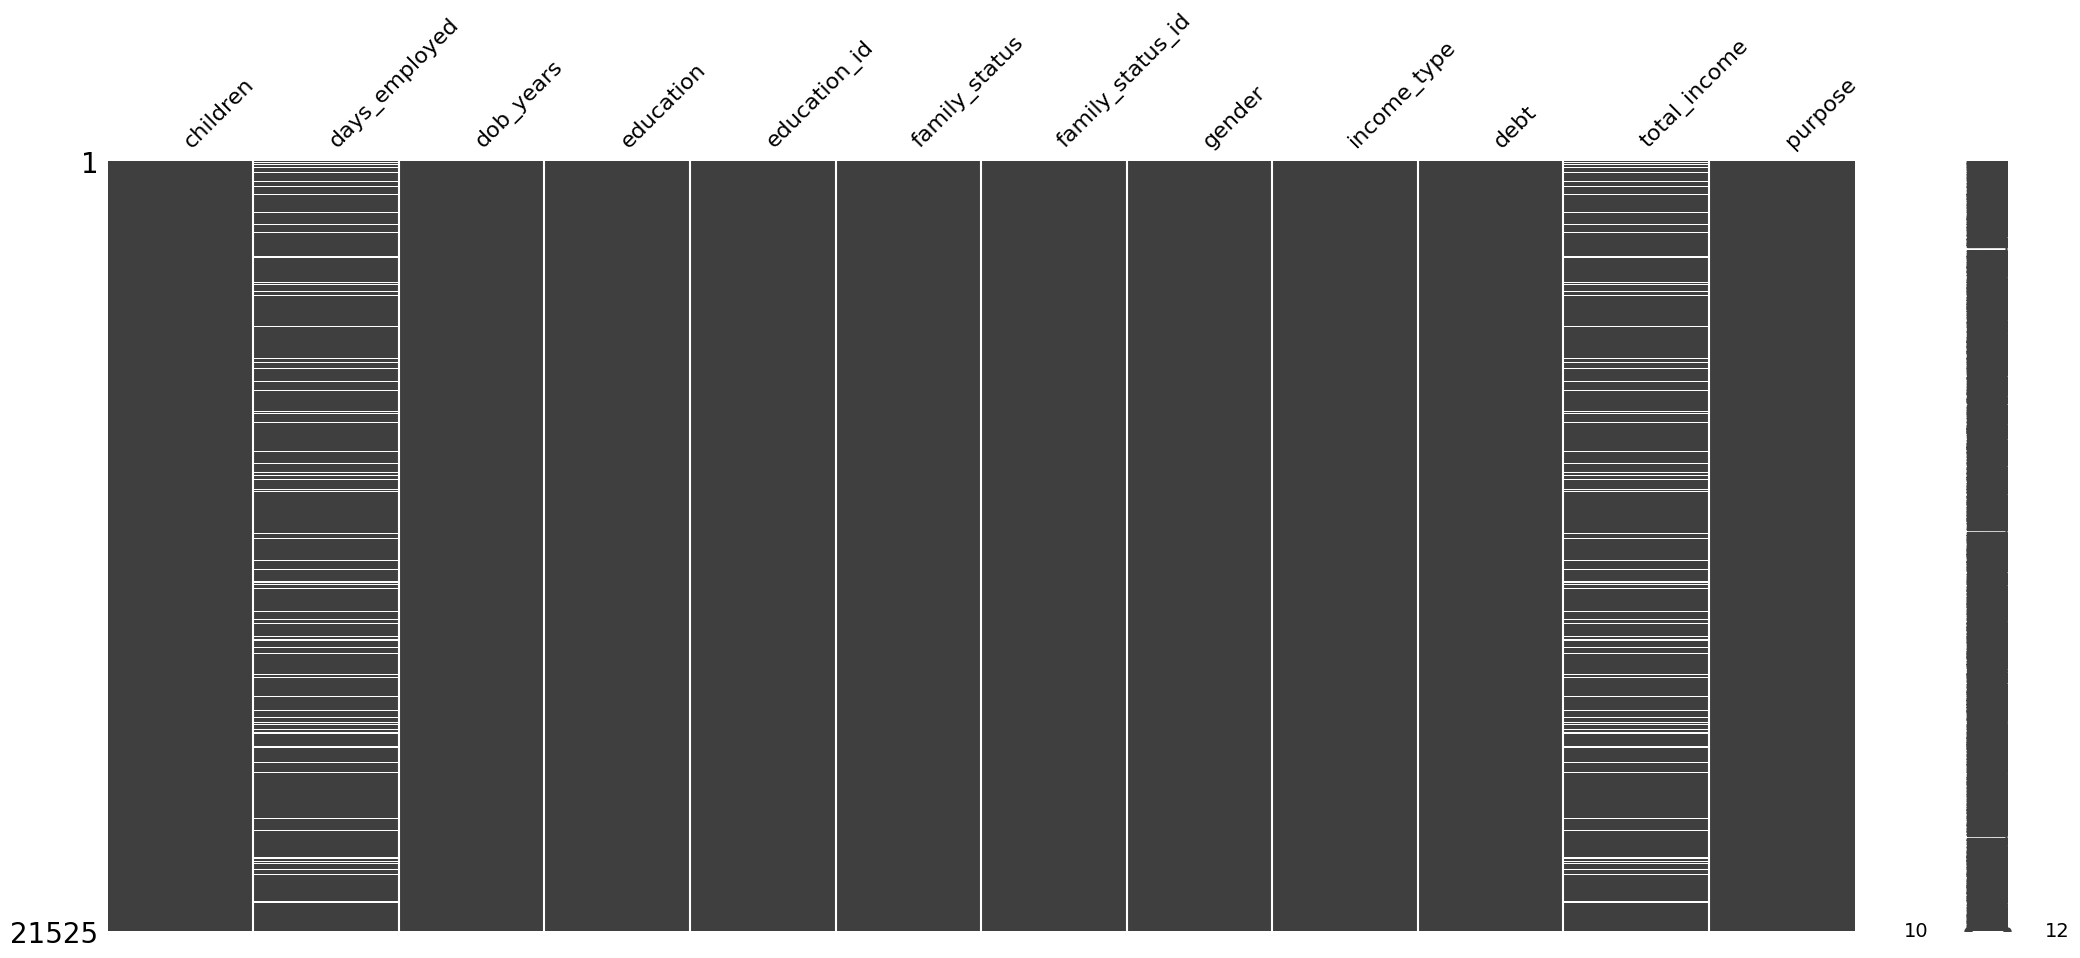

In [16]:
msno.matrix(credit_scoring)

<AxesSubplot: >

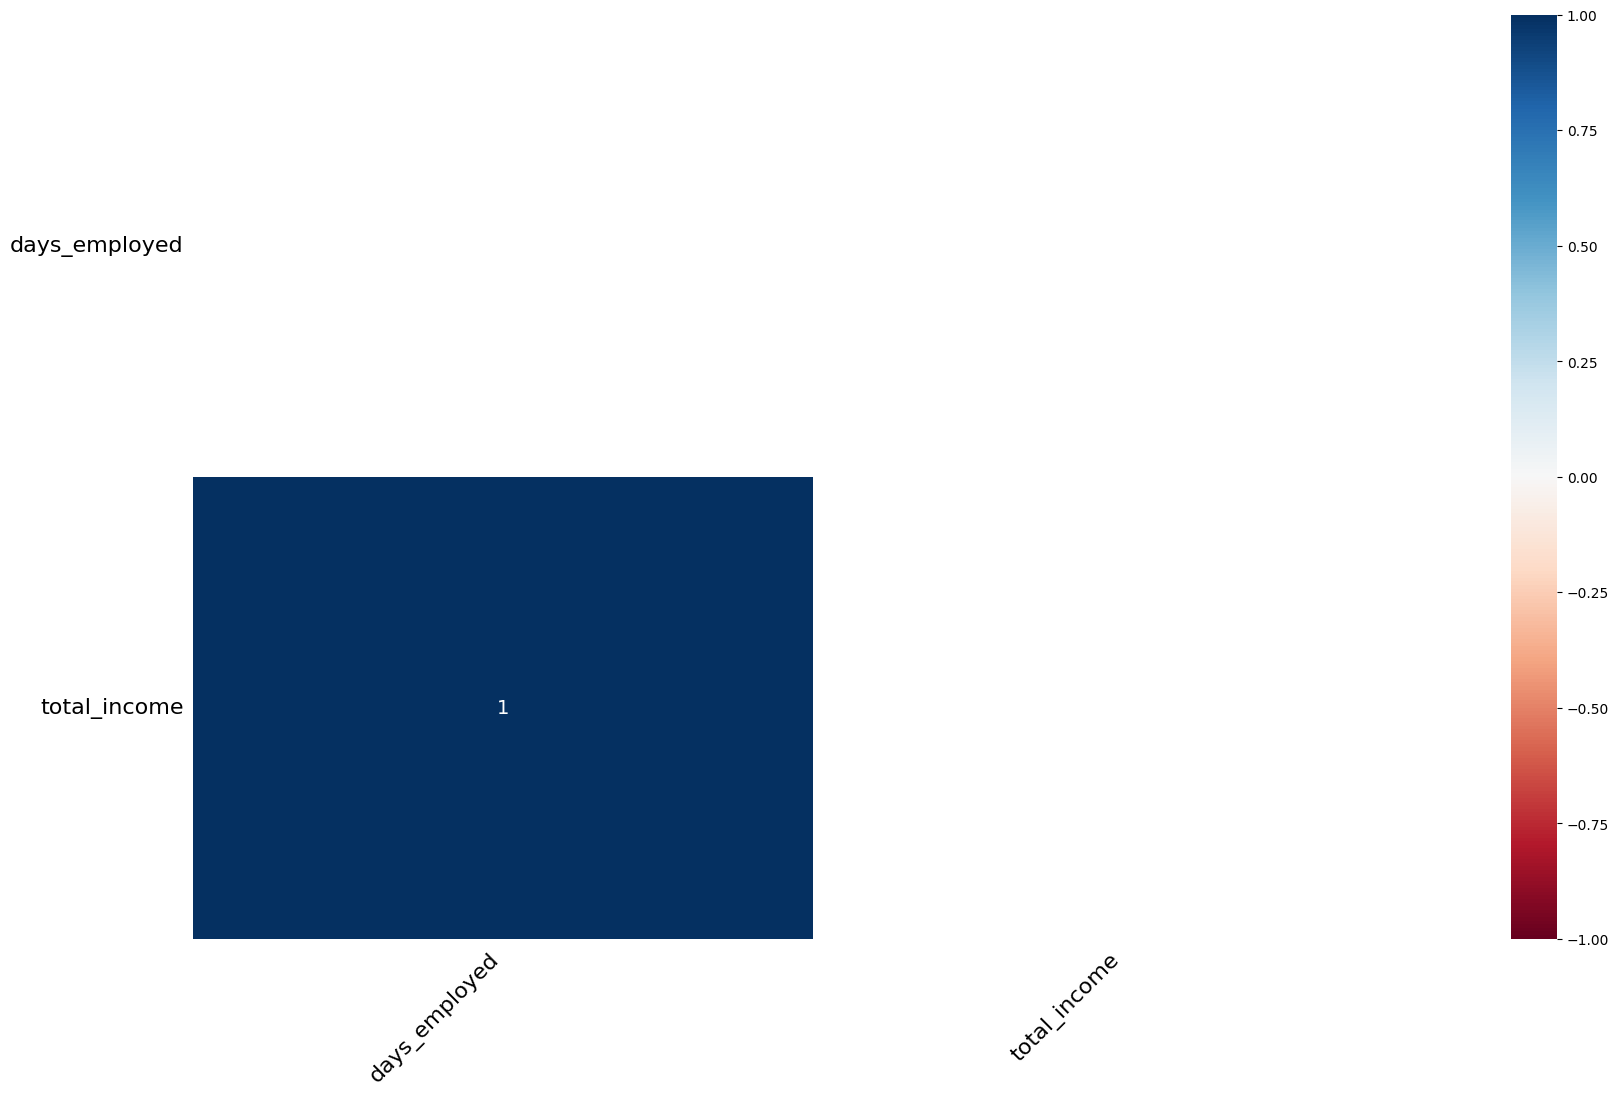

In [17]:
msno.heatmap(credit_scoring)

Como vemos en los tres códigos anteriores (apoyados con el paquete missingno de Python), se comprueban los datos obtenidos hasta el momento: 2,174 datos son los datos ausentes en las columnas days_employed y total_income, existe una fuerte correlación entre ambas columnas, y el porcentaje de datos ausentes es el 10.099884%.

**Conclusión intermedia**

Como se pudo observar, existe una alta correlación entra las columnas con datos faltantes, es decir, cuando existe un valor ausente en days_employed también falta en total_income.


In [18]:
# Se creará una lista con las columnas relevantes 

relevant_columns = ['children','dob_years', 'education', 'family_status', 'debt', 'income_type']
credit_scoring[relevant_columns].values.tolist()

[[1, 42, "bachelor's degree", 'married', 0, 'employee'],
 [1, 36, 'secondary education', 'married', 0, 'employee'],
 [0, 33, 'Secondary Education', 'married', 0, 'employee'],
 [3, 32, 'secondary education', 'married', 0, 'employee'],
 [0, 53, 'secondary education', 'civil partnership', 0, 'retiree'],
 [0, 27, "bachelor's degree", 'civil partnership', 0, 'business'],
 [0, 43, "bachelor's degree", 'married', 0, 'business'],
 [0, 50, 'SECONDARY EDUCATION', 'married', 0, 'employee'],
 [2, 35, "BACHELOR'S DEGREE", 'civil partnership', 0, 'employee'],
 [0, 41, 'secondary education', 'married', 0, 'employee'],
 [2, 36, "bachelor's degree", 'married', 0, 'business'],
 [0, 40, 'secondary education', 'married', 0, 'employee'],
 [0, 65, 'secondary education', 'civil partnership', 0, 'retiree'],
 [0, 54, 'some college', 'married', 0, 'employee'],
 [0, 56, "bachelor's degree", 'civil partnership', 1, 'business'],
 [1, 26, 'secondary education', 'married', 0, 'employee'],
 [0, 35, 'secondary educati

In [19]:
# Con la ayuda de un bucle se recorrerá la lista de las columnas relevantes para determinar la diferencia entre las distribuciones.

print(credit_scoring.dropna()[relevant_columns].value_counts(normalize=True))
print(credit_scoring[relevant_columns].value_counts(normalize=True))

children  dob_years  education            family_status      debt  income_type  
0         48         secondary education  married            0     employee         0.004909
          49         secondary education  married            0     employee         0.004703
          62         secondary education  married            0     retiree          0.004703
          59         secondary education  married            0     retiree          0.004599
          57         secondary education  married            0     retiree          0.004341
                                                                                      ...   
          59         Primary Education    widow / widower    0     retiree          0.000052
                     SECONDARY EDUCATION  civil partnership  0     civil servant    0.000052
                                                                   retiree          0.000052
                                          unmarried          0     retiree        

**Conclusión intermedia**

Como se observa con los dos bloques de código de arriba, se puede confirmar que los valores ausentes son aleatorios. 

Para determinar la aleteoridad de los datos se hicieron varias listas con columnas relevantes (debt+gender, family_status_id+purpose, children+gender, income_type+gender, purpose+dob_years, y la anotada en el código de arriba:children+dob_years+education+family_status+debt+income_type).

A partir de la combinación de las columnas de arriba (y luego el bucle), se pudo observar una gran similitud de las distribuciones entre los valores con o sin datos ausentes, por lo que se reafirma la aleteroridad de los datos.

## Parte 2. Transformación de datos

En este apartado repasaremos columna por columna para identificar las posibles problemáticas.

In [20]:
# Veamos todos los valores en la columna de educación para verificar si será necesario corregir la ortografía y qué habrá que corregir exactamente
credit_scoring['education'].unique()

array(["bachelor's degree", 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', "BACHELOR'S DEGREE", 'some college',
       'primary education', "Bachelor's Degree", 'SOME COLLEGE',
       'Some College', 'PRIMARY EDUCATION', 'Primary Education',
       'Graduate Degree', 'GRADUATE DEGREE', 'graduate degree'],
      dtype=object)

In [21]:
# Como se supuso anteriormente, existen 15 datos únicos en education y 5 en education_id con lo cual se comprueba que los posibles nombres 
# están en mayúsculas, minúsculas y en mayúsculas con minúsculas.
# Por lo anterior, los datos se pasarán a minúsculas para su homogenización. 

diccionario = {'Secondary Education': 'secondary education', 'SECONDARY EDUCATION': 'secondary education',"BACHELOR'S DEGREE" : "bachelor's degree", 
               'SOME COLLEGE' : 'some college', 'Some College' : 'some college', 'PRIMARY EDUCATION' : 'primary education', 'Primary Education' : 'primary education', 
               'Graduate Degree' : 'graduate degree', 'GRADUATE DEGREE' : 'graduate degree', "Bachelor's Degree" : "bachelor's degree"}

credit_scoring = credit_scoring.replace({'education' : diccionario}, regex=True)

In [22]:
# Comprobar todos los valores en la columna para asegurarnos de que los hayamos corregido
credit_scoring['education'].unique()

array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

In [23]:
# Otra forma de realizar el cambio de mayúsculas (y mayúsculas con minúsculas) es utilizar el accesor str y el método lower.

credit_scoring['education'] = credit_scoring['education'].str.lower()
credit_scoring['education'].unique()

# Se anotan ambas formas de realizar el cambio a minúsculas.

array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

In [24]:
# Veamos la distribución de los valores en la columna `children`
credit_scoring['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Con respecto a la columna children, se puede observar que existen dos datos a destacar: 47 usuarios tienen -1 hijo y 76 tienen 20 hijos.

Arreglaremos los datos asumiendo que existe un error de captura en -1, lo que significa que convertiremos los -1 a 1. Así mismo, trabajaremos los valores de 20 hijos convirtiéndolos a 2, porque no se ve plausible que haya más clientes con 20 hijos que con 4 o 5 hijos . 

In [25]:
# Entonces, convertiremos los -1 a 1 y los 20 a 2 en el número de hijos de la columna children
credit_scoring['children'] = credit_scoring['children'].abs()

credit_scoring['children'] = credit_scoring['children'].replace(20,2)

In [26]:
# Comprobar la columna `children` de nuevo para asegurarnos de que todo está arreglado

credit_scoring['children'].value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

Una vez corregida la columna children es necesario revisar la columna days_employed.

In [27]:
# Encuentra datos problemáticos en `days_employed`, si existen, y calcula el porcentaje
credit_scoring['days_employed'].describe()

count     19351.000000
mean      63046.497661
std      140827.311974
min      -18388.949901
25%       -2747.423625
50%       -1203.369529
75%        -291.095954
max      401755.400475
Name: days_employed, dtype: float64

A simple vista puede intuirse que los valores negativos son los correctos, porque el valor del tercer cuartil son 8 meses, el 50% son 3.2 años y el primer cuartil son 7.5 años.

In [28]:
print(credit_scoring.dtypes)

children              int64
days_employed       float64
dob_years             int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income        float64
purpose              object
dtype: object


In [29]:
#Veamos qué número de valores positivos y negativos de la columna days_employed existen según el número de hijos

pos_neg_aus = credit_scoring.groupby(credit_scoring['children'])

def pos(col):
    return col[col>0].count()

def neg(col):
    return col[col<0].count()


print(pos_neg_aus['days_employed'].agg([('negatives_values', neg),
                                        ('positive_values', pos)
                                        ]))

          negatives_values  positive_values
children                                   
0                     9556             3154
1                     4127              260
2                     1894               24
3                      288                6
4                       33                1
5                        8                0


In [30]:
pos_neg_aus = credit_scoring.groupby(credit_scoring['family_status'])

def pos(col):
    return col[col>0].count()

def neg(col):
    return col[col<0].count()


print(pos_neg_aus['days_employed'].agg([('negatives_values', neg),
                                        ('positive_values', pos)
                                        ]))

                   negatives_values  positive_values
family_status                                       
civil partnership              3158              577
divorced                        885              198
married                        9270             1873
unmarried                      2212              313
widow / widower                 381              484


Como vemos a partir de las dos funciones anteriores, los datos positivos (los cuales asumimos que están erroneos) son alrededor del 25% del total income.

In [31]:
pos_neg_aus = credit_scoring.groupby(credit_scoring['family_status'])

def pos(col):
    return col[col>0].mean()

def neg(col):
    return col[col<0].mean()


print(pos_neg_aus['days_employed'].agg([('negatives_values', neg),
                                        ('positive_values', pos)
                                        ]))

                   negatives_values  positive_values
family_status                                       
civil partnership      -2252.614755    365678.121674
divorced               -2445.741500    365472.778281
married                -2470.512856    364438.166349
unmarried              -1848.287053    366677.749033
widow / widower        -3041.384914    365118.058547


In [32]:
pos_neg_aus = credit_scoring.groupby(credit_scoring['family_status'])

def pos(col):
    return col[col>0].median()
def neg(col):
    return col[col<0].median()


print(pos_neg_aus['days_employed'].agg([('negatives_values', neg),
                                        ('positive_values', pos)
                                        ]))

                   negatives_values  positive_values
family_status                                       
civil partnership      -1542.599791    366791.950708
divorced               -1693.774783    366355.800736
married                -1746.662391    364225.371849
unmarried              -1234.117726    367053.055831
widow / widower        -2331.334484    364839.427296


Como se observó en los dos fragmentos anteriores de código, los datos negativos para la columna **days_employed** parecen más plausibles que los datos positivos.

Por ejemplo, para el estado civil de **unión civil**, los valores negativos presentaron una media de 6.1 años trabajados y una mediana de 4.2 años trabajados, mientras que los valores positivos mostraron una media de 1,001 años trabajados y una mediana de 1,004 años trabajados. Esta tendencia se repite en otros estados civiles, donde tanto los valores positivos como los negativos se comportan de manera más uniforme en términos de su media o mediana.

Sin embargo, es importante destacar que los valores positivos se mantuvieron relativamente estables en su media y mediana, mientras que los valores negativos presentaron una diferencia más pronunciada entre la media y la mediana, lo que indica la presencia de valores extremos.

A raíz de estos hallazgos, se determina que es necesario convertir los valores positivos a cero y, posteriormente, reemplazar todos los valores por la mediana en una etapa posterior del análisis.

In [33]:
# Con esta función pasaremos los valores superiores a 0 como NaN y los negativos los dejaremos igual, así mismo, crearemos la columna days_emploed_zero
def to_zero(x):
   if x > 0:
        return np.nan 
   else:
        return x 

credit_scoring['days_employed_zero'] = credit_scoring['days_employed'].apply(to_zero)

print(credit_scoring['days_employed'])

0         -8437.673028
1         -4024.803754
2         -5623.422610
3         -4124.747207
4        340266.072047
             ...      
21520     -4529.316663
21521    343937.404131
21522     -2113.346888
21523     -3112.481705
21524     -1984.507589
Name: days_employed, Length: 21525, dtype: float64


In [34]:
credit_scoring.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,days_employed_zero
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,-8437.673028
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,-4024.803754
2,0,-5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,-5623.422610
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,-4124.747207
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,NaN
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,-926.185831
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions,-2879.202052
7,0,-152.779569,50,secondary education,1,married,0,M,employee,0,21731.829,education,-152.779569
8,2,-6929.865299,35,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093,having a wedding,-6929.865299
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family,-2188.756445


In [35]:
credit_scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   children            21525 non-null  int64  
 1   days_employed       19351 non-null  float64
 2   dob_years           21525 non-null  int64  
 3   education           21525 non-null  object 
 4   education_id        21525 non-null  int64  
 5   family_status       21525 non-null  object 
 6   family_status_id    21525 non-null  int64  
 7   gender              21525 non-null  object 
 8   income_type         21525 non-null  object 
 9   debt                21525 non-null  int64  
 10  total_income        19351 non-null  float64
 11  purpose             21525 non-null  object 
 12  days_employed_zero  15906 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 2.1+ MB


In [36]:
credit_scoring.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,days_employed_zero
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,-8437.673028
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,-4024.803754
2,0,-5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,-5623.422610
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,-4124.747207
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,NaN
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,-926.185831
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions,-2879.202052
7,0,-152.779569,50,secondary education,1,married,0,M,employee,0,21731.829,education,-152.779569
8,2,-6929.865299,35,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093,having a wedding,-6929.865299
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family,-2188.756445


In [37]:
#Volvamos a verificar que no hay valores positivos 

pos_neg_aus = credit_scoring.groupby(credit_scoring['children'])

def pos(col):
    return col[col>0].count()

def neg(col):
    return col[col<0].count()


print(pos_neg_aus['days_employed_zero'].agg([('negatives_values', neg),
                                        ('positive_values', pos)
                                        ]))

          negatives_values  positive_values
children                                   
0                     9556                0
1                     4127                0
2                     1894                0
3                      288                0
4                       33                0
5                        8                0


In [38]:
# Convirtamos los valores negativos en positivos
credit_scoring['days_employed_zero'] = credit_scoring['days_employed_zero'].abs()

#revisemos si ya se encuentran cambiados a positivos
pos_neg_aus = credit_scoring.groupby(credit_scoring['children'])

def pos(col):
    return col[col>0].count()

def neg(col):
    return col[col<0].count()


print(pos_neg_aus['days_employed_zero'].agg([('negatives_values', neg),
                                        ('positive_values', pos)
                                        ]))

          negatives_values  positive_values
children                                   
0                        0             9556
1                        0             4127
2                        0             1894
3                        0              288
4                        0               33
5                        0                8


In [39]:
# Para trabajar de mejor manera crearemos una columna nueva donde dividiremos el número de días entre 365 para ver la información en años

credit_scoring['month_employed'] = credit_scoring['days_employed'] / 365
print(credit_scoring['month_employed'])
credit_scoring['month_employed'] = credit_scoring['children'].abs()
print(credit_scoring['month_employed'])


0        -23.116912
1        -11.026860
2        -15.406637
3        -11.300677
4        932.235814
            ...    
21520    -12.409087
21521    942.294258
21522     -5.789991
21523     -8.527347
21524     -5.437007
Name: month_employed, Length: 21525, dtype: float64
0        1
1        1
2        0
3        3
4        0
        ..
21520    1
21521    0
21522    1
21523    3
21524    2
Name: month_employed, Length: 21525, dtype: int64


In [40]:
# Para una mejor análisis de datos, la columna nueva month_employed se redondeará

credit_scoring['month_employed'].round()

credit_scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   children            21525 non-null  int64  
 1   days_employed       19351 non-null  float64
 2   dob_years           21525 non-null  int64  
 3   education           21525 non-null  object 
 4   education_id        21525 non-null  int64  
 5   family_status       21525 non-null  object 
 6   family_status_id    21525 non-null  int64  
 7   gender              21525 non-null  object 
 8   income_type         21525 non-null  object 
 9   debt                21525 non-null  int64  
 10  total_income        19351 non-null  float64
 11  purpose             21525 non-null  object 
 12  days_employed_zero  15906 non-null  float64
 13  month_employed      21525 non-null  int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 2.3+ MB


In [41]:
credit_scoring['days_employed_zero'].describe()

count    15906.000000
mean      2353.015932
std       2304.243851
min         24.141633
25%        756.371964
50%       1630.019381
75%       3157.480084
max      18388.949901
Name: days_employed_zero, dtype: float64

Como se comentó más arriba, es probable que existan valores extremos ya que la media es de 6.4 años y la mediana es 4.4 años.

Con respecto a la edad de los clientes se observó un único dato erróneo ya que se presentó un 0 como un dato en la columna dob_years

In [42]:
# Revisamos `dob_years` en busca de valores sospechosos y cuenta el porcentaje
print(credit_scoring['dob_years'].unique())

[42 36 33 32 53 27 43 50 35 41 40 65 54 56 26 48 24 21 57 67 28 63 62 47
 34 68 25 31 30 20 49 37 45 61 64 44 52 46 23 38 39 51  0 59 29 60 55 58
 71 22 73 66 69 19 72 70 74 75]


In [43]:
print(credit_scoring['dob_years'].value_counts())

35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
22    183
66    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64


Como se observa sobre los valores únicos, casi todos parecen coherentes a excepción del 0, por lo que se eliminará y se sustituirá por la media. 

In [44]:
# Resuelve los problemas en la columna `dob_years`, si existen

credit_scoring.query("dob_years == 0").gender.value_counts()

# Como se observa, casi dos tercios de los datos faltantes son de mujeres. 

F    72
M    29
Name: gender, dtype: int64

In [45]:
credit_scoring.query("dob_years == 0").education.value_counts()

# Casi dos tercios son de educación secundaria

secondary education    64
bachelor's degree      35
some college            2
Name: education, dtype: int64

In [46]:
credit_scoring.query("dob_years == 0").family_status.value_counts()

# la mitad de los datos faltantes son de personas casadas

married              49
civil partnership    21
unmarried            16
divorced             10
widow / widower       5
Name: family_status, dtype: int64

In [47]:
print(credit_scoring['dob_years'].median())

print(credit_scoring['dob_years'].mean())

42.0
43.29337979094077


In [48]:
# Se calculará la media sin los ceros presentes 

column = credit_scoring['dob_years']
count_dob_years = column[column!=0].mean()
print(count_dob_years)

43.497479462285284


In [49]:
# Se calculará la mediana sin los ceros presentes 

column = credit_scoring['dob_years']
count_dob_years = column[column!=0].median()
print(count_dob_years)

43.0


In [50]:
# Como se observa en los dos resultados inmediatos anteriores, la media y la mediana es de 43 años, por lo que se cambiarán los cero a 43 años.
credit_scoring['dob_years'] = credit_scoring['dob_years'].replace(0,43)

In [51]:
# Comprueba el resultado - asegúrate de que esté arreglado
print(credit_scoring['dob_years'].value_counts())

35    617
43    614
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
66    183
22    183
67    167
21    111
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64


Ahora revisemos la columna `family_status`. 

In [52]:
# Veamos los valores de la columna
print(credit_scoring['family_status'].unique())

print(credit_scoring['family_status'].value_counts())


['married' 'civil partnership' 'widow / widower' 'divorced' 'unmarried']
married              12380
civil partnership     4177
unmarried             2813
divorced              1195
widow / widower        960
Name: family_status, dtype: int64


In [53]:
# Como se observa en la parte de arriba, no hay valores extremos o raros en las diferentes categorías, pero podría ser problemático 
# el nombre de la columna widow / widower, por lo que se cambiará a widow para mejor manejo de la columna.
# Podría optarse por el neutro surviving spouse, pero se manejará widow para ambos sexos.

credit_scoring['family_status'] = credit_scoring['family_status'].replace('widow / widower', 'widow')


In [54]:
# Con este código se puede observar que lo anterior ya está modificado
print(credit_scoring['family_status'].value_counts())

married              12380
civil partnership     4177
unmarried             2813
divorced              1195
widow                  960
Name: family_status, dtype: int64


Ahora revisemos la columna `gender`.

In [55]:
# Veamos los valores en la columna gender
print(credit_scoring['gender'].unique())
print(credit_scoring['gender'].value_counts())

['F' 'M' 'XNA']
F      14236
M       7288
XNA        1
Name: gender, dtype: int64


In [56]:
# Como se observa, existe un resultado anotado con XNA, debido al número de mujeres (9,945) versus hombres (5,960) se decidió cambiar este dato a F.
credit_scoring['gender'] = credit_scoring['gender'].replace('XNA','F')

In [57]:
# Comprueba el resultado - asegúrate de que esté arreglado
print(credit_scoring['gender'].unique())
print(credit_scoring['gender'].value_counts())

['F' 'M']
F    14237
M     7288
Name: gender, dtype: int64


In [58]:
#Crearemos una nueva columna llamada gender_values en donde M será 1 y F será 2

def gender(x):
    if 'M' in x:
        return 1
    elif 'F' in x:
        return 2

credit_scoring['gender_values'] = credit_scoring['gender'].apply(gender)

print(credit_scoring['gender_values'].value_counts())

2    14237
1     7288
Name: gender_values, dtype: int64


Ahora vamos a revisar la columna `income_type`.

In [59]:
# Veamos los valores en la columna
print(credit_scoring['income_type'].value_counts())

employee                       11119
business                        5085
retiree                         3856
civil servant                   1459
unemployed                         2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64


In [60]:
print(credit_scoring['income_type'].value_counts(normalize=True))

employee                       0.516562
business                       0.236237
retiree                        0.179141
civil servant                  0.067782
unemployed                     0.000093
entrepreneur                   0.000093
student                        0.000046
paternity / maternity leave    0.000046
Name: income_type, dtype: float64


Como observamos al contar los valores únicos, son ínfimos los datos de unemployed, entrepreneur, student y paternity/maternity leave por lo cual se eliminarán dichas filas que equivalen a 6 filas de 21,525 (o sea, el 0.02 % del total de datos de la columna 'income_type')

In [61]:
credit_scoring_delete_types = credit_scoring[(credit_scoring['income_type'] != 'employee') & (credit_scoring['income_type'] !='business') & (credit_scoring['income_type'] !='retiree') & (credit_scoring['income_type'] !='civil servant')].index 

credit_scoring = credit_scoring.drop(credit_scoring_delete_types)

print(credit_scoring.head(10))

   children  days_employed  dob_years            education  education_id  \
0         1   -8437.673028         42    bachelor's degree             0   
1         1   -4024.803754         36  secondary education             1   
2         0   -5623.422610         33  secondary education             1   
3         3   -4124.747207         32  secondary education             1   
4         0  340266.072047         53  secondary education             1   
5         0    -926.185831         27    bachelor's degree             0   
6         0   -2879.202052         43    bachelor's degree             0   
7         0    -152.779569         50  secondary education             1   
8         2   -6929.865299         35    bachelor's degree             0   
9         0   -2188.756445         41  secondary education             1   

       family_status  family_status_id gender income_type  debt  total_income  \
0            married                 0      F    employee     0     40620.102   
1

In [62]:
print(credit_scoring['income_type'].value_counts(normalize=True))

employee         0.516706
business         0.236303
retiree          0.179190
civil servant    0.067801
Name: income_type, dtype: float64


In [63]:
print(credit_scoring.head())

   children  days_employed  dob_years            education  education_id  \
0         1   -8437.673028         42    bachelor's degree             0   
1         1   -4024.803754         36  secondary education             1   
2         0   -5623.422610         33  secondary education             1   
3         3   -4124.747207         32  secondary education             1   
4         0  340266.072047         53  secondary education             1   

       family_status  family_status_id gender income_type  debt  total_income  \
0            married                 0      F    employee     0     40620.102   
1            married                 0      F    employee     0     17932.802   
2            married                 0      M    employee     0     23341.752   
3            married                 0      M    employee     0     42820.568   
4  civil partnership                 1      F     retiree     0     25378.572   

                   purpose  days_employed_zero  month_em

In [64]:
print(credit_scoring['income_type'].value_counts())

employee         11119
business          5085
retiree           3856
civil servant     1459
Name: income_type, dtype: int64


Ahora veamos si hay duplicados en nuestros datos.

In [65]:
# Comprobar los duplicados
duplicate_rows = credit_scoring[credit_scoring.duplicated()]
print(duplicate_rows)

       children  days_employed  dob_years            education  education_id  \
2849          0            NaN         41  secondary education             1   
3290          0            NaN         58  secondary education             1   
4182          1            NaN         34    bachelor's degree             0   
4851          0            NaN         60  secondary education             1   
5557          0            NaN         58  secondary education             1   
...         ...            ...        ...                  ...           ...   
20702         0            NaN         64  secondary education             1   
21032         0            NaN         60  secondary education             1   
21132         0            NaN         47  secondary education             1   
21281         1            NaN         30    bachelor's degree             0   
21415         0            NaN         54  secondary education             1   

           family_status  family_status

Se encontraron 71 columnas duplicadas, podría suponerse que el duplicado podría equivaler a que la pareja se registrara como cliente del banco, al ser un número reducido de duplicados se eliminarán del dataframe.

In [66]:
credit_scoring_clean = credit_scoring.drop_duplicates().reset_index(drop=True)

In [67]:
duplicate_rows = credit_scoring_clean[credit_scoring_clean.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [children, days_employed, dob_years, education, education_id, family_status, family_status_id, gender, income_type, debt, total_income, purpose, days_employed_zero, month_employed, gender_values]
Index: []


In [68]:
# Comprobeamos el tamaño del conjunto de datos que tienes ahora, después de haber ejecutado estas primeras manipulaciones

print(credit_scoring_clean.columns)
print('------------------------')
print(credit_scoring_clean.shape)
print('------------------------')
print(credit_scoring_clean.dtypes)
print('------------------------')
credit_scoring.info()

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose', 'days_employed_zero', 'month_employed',
       'gender_values'],
      dtype='object')
------------------------
(21448, 15)
------------------------
children                int64
days_employed         float64
dob_years               int64
education              object
education_id            int64
family_status          object
family_status_id        int64
gender                 object
income_type            object
debt                    int64
total_income          float64
purpose                object
days_employed_zero    float64
month_employed          int64
gender_values           int64
dtype: object
------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21519 entries, 0 to 21524
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------    

Hasta este momento, se han realizado las siguientes transformaciones en los datos:

- Columna **education**: se unificaron los nombres de las categorías y se transformaron todas a minúsculas.

- Columna **children**: se convirtieron los valores -1 a 1 y los valores 20 se transformaron en 2.

- Columna **days_employed**: se identificó que los valores positivos eran irreales cuando se convirtieron a meses (por ejemplo, había datos de 1,000 años). Por lo tanto, se decidió eliminar los valores positivos y trabajar únicamente con los valores negativos. Estos valores negativos se convirtieron a positivos y luego se crearon dos columnas nuevas: "days_employed_zero" con los datos absolutos de los días y una columna adicional con los días convertidos en meses (redondeados).

- Columna **dob_years**: se eliminó el registro con valor 0 y se sustituyó por 39, que representa la media y mediana de los años de los demás usuarios.

- Columna **family_status**: no se identificaron registros problemáticos. Únicamente se cambió la categoría "widow / widower" por "widow" para una mejor consistencia en el manejo de los datos.

- Columna **gender**: se encontró un único registro escrito como 'XNA' y se decidió transformarlo a "mujer", ya que el número de registros de mujeres era el doble que el de hombres.

- Columna **income_type**: se identificaron registros únicos de "student", "entrepreneur", "unemployed" y "paternity/maternity leave". Estos registros fueron eliminados del conjunto de datos.

- Columna **gender_values**: se convirtieron los valores de la columna "gender", asignando el valor 1 para hombres y 2 para mujeres.

- Duplicados: se identificaron 71 registros duplicados, los cuales fueron eliminados del conjunto de datos.


## Parte 3. Trabajar con valores ausentes

### Restaurar valores ausentes en `total_income`

In [69]:
credit_scoring_clean['total_income'].describe()

count     19346.000000
mean      26786.933500
std       16471.935115
min        3306.762000
25%       16493.600500
50%       23203.328000
75%       32550.337000
max      362496.645000
Name: total_income, dtype: float64

In [70]:
credit_scoring_clean.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,days_employed_zero,month_employed,gender_values
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,8437.673028,1,2
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,4024.803754,1,2
2,0,-5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,5623.422610,0,1
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,4124.747207,3,1
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,NaN,0,2
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,926.185831,0,1
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions,2879.202052,0,2
7,0,-152.779569,50,secondary education,1,married,0,M,employee,0,21731.829,education,152.779569,0,1
8,2,-6929.865299,35,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093,having a wedding,6929.865299,2,2
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family,2188.756445,0,1


<AxesSubplot: >

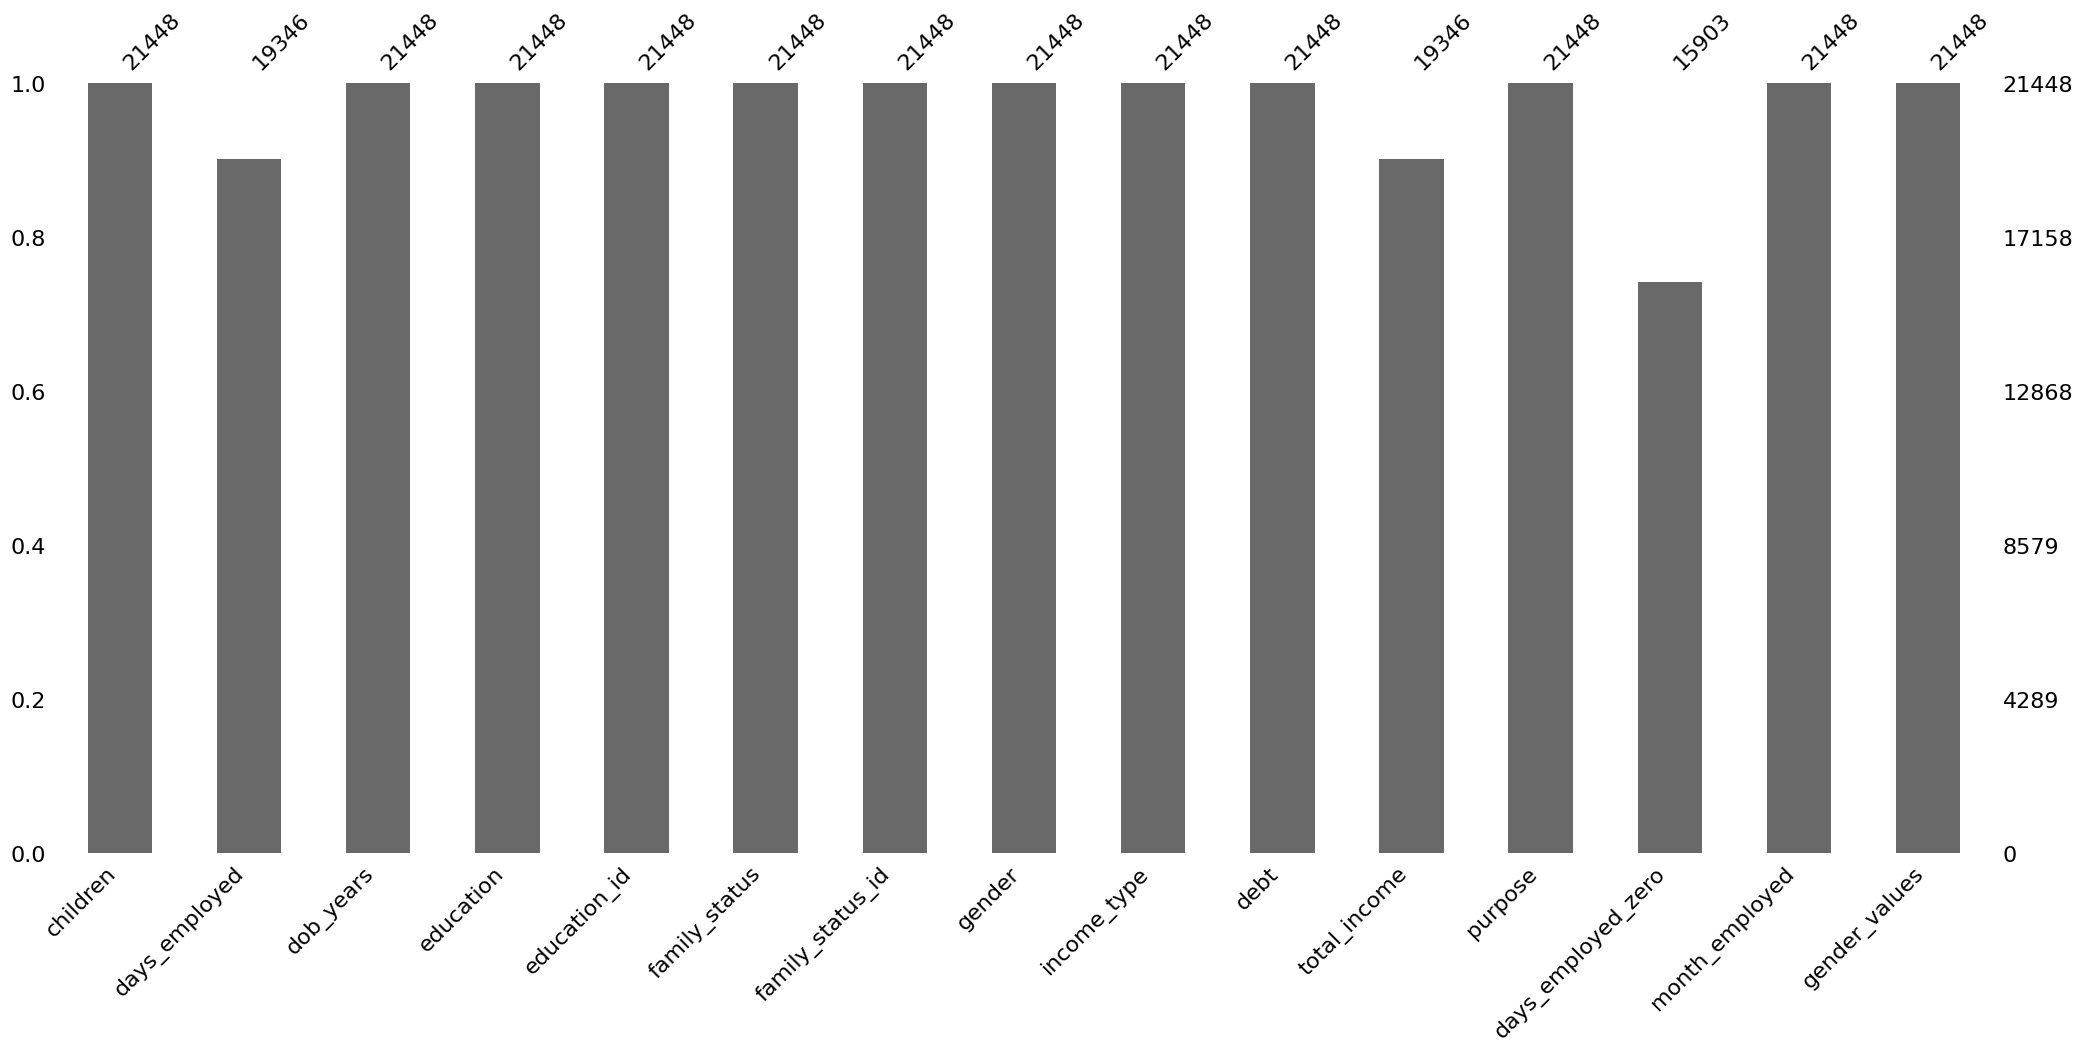

In [71]:
# Revisemos los valores de las columnas
msno.bar(credit_scoring_clean)

Antes de rellenar los valores ausentes se hará grandes grupos de edad para a partir de estos rellenar con la media de cada grupo de edad.

In [72]:
# Función para agrupar edades

#print(credit_scoring_whitout_nan['dob_years'].describe())

def age_bucket(x):
    if x < 20:
        return '< 20'
    elif x < 30:
        return '20-29'
    elif x < 40:
        return '30-39'
    elif x < 50:
        return '40-49'
    elif x < 60:
        return '50-59'
    elif x < 70:
        return '60-69'
    else:
        return '70 +'

credit_scoring_clean['age_bucket'] = credit_scoring_clean['dob_years'].apply(age_bucket)

print(credit_scoring_clean['age_bucket'].value_counts())


30-39    5660
40-49    5454
50-59    4656
20-29    3164
60-69    2331
70 +      169
< 20       14
Name: age_bucket, dtype: int64


In [73]:
# Como se identificó que son un número pequeño los menos de 20 (13) y los mayores de 70 (20) se agrgará a los primeros en el grupo superior (20-29)
# y los segundos al grupo inferior(60-69)
def age_bucket(x):
    if x < 30:
        return '< 29'
    elif x < 40:
        return '30-39'
    elif x < 50:
        return '40-49'
    elif x < 60:
        return '50-59'
    else:
        return '> 60'  

credit_scoring_clean['age_bucket'] = credit_scoring_clean['dob_years'].apply(age_bucket)

print(credit_scoring_clean['age_bucket'].value_counts())

30-39    5660
40-49    5454
50-59    4656
< 29     3178
> 60     2500
Name: age_bucket, dtype: int64


In [74]:
credit_scoring_clean.describe(include='all')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,days_employed_zero,month_employed,gender_values,age_bucket
count,21448.000000,19346.000000,21448.000000,21448,21448.000000,21448,21448.000000,21448,21448,21448.000000,19346.000000,21448,15903.000000,21448.000000,21448.000000,21448
unique,NaN,NaN,NaN,5,NaN,5,NaN,2,4,NaN,NaN,38,NaN,NaN,NaN,5
top,NaN,NaN,NaN,secondary education,NaN,married,NaN,F,employee,NaN,NaN,wedding ceremony,NaN,NaN,NaN,30-39
freq,NaN,NaN,NaN,15170,NaN,12336,NaN,14172,11084,NaN,NaN,791,NaN,NaN,NaN,5660
mean,0.480558,63025.139321,43.475476,NaN,0.817232,NaN,0.973890,NaN,NaN,0.081080,26786.933500,NaN,2353.183365,0.480558,1.660761,NaN
std,0.756067,140809.128176,12.213074,NaN,0.548635,NaN,1.421569,NaN,NaN,0.272964,16471.935115,NaN,2304.360280,0.756067,0.473462,NaN
min,0.000000,-18388.949901,19.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,0.000000,3306.762000,NaN,24.141633,0.000000,1.000000,NaN
25%,0.000000,-2747.486276,33.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,16493.600500,NaN,756.656328,0.000000,1.000000,NaN
50%,0.000000,-1203.637301,43.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,23203.328000,NaN,1630.040900,0.000000,2.000000,NaN
75%,1.000000,-291.146144,53.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000,32550.337000,NaN,3157.305854,1.000000,2.000000,NaN


In [75]:
#Para transformar el total_income de los valores ausentes nos valdremos de agrupar tres variables (age_bucket, gender e income_type a los cuáles les aplicaremos la mediana)

credit_scoring_clean['total_income'].fillna(credit_scoring_clean.groupby(['age_bucket', 'gender', 'income_type'])['total_income'].transform('median'),inplace=True)

In [76]:
credit_scoring_clean.describe(include='all')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,days_employed_zero,month_employed,gender_values,age_bucket
count,21448.000000,19346.000000,21448.000000,21448,21448.000000,21448,21448.000000,21448,21448,21448.000000,21448.000000,21448,15903.000000,21448.000000,21448.000000,21448
unique,NaN,NaN,NaN,5,NaN,5,NaN,2,4,NaN,NaN,38,NaN,NaN,NaN,5
top,NaN,NaN,NaN,secondary education,NaN,married,NaN,F,employee,NaN,NaN,wedding ceremony,NaN,NaN,NaN,30-39
freq,NaN,NaN,NaN,15170,NaN,12336,NaN,14172,11084,NaN,NaN,791,NaN,NaN,NaN,5660
mean,0.480558,63025.139321,43.475476,NaN,0.817232,NaN,0.973890,NaN,NaN,0.081080,26452.361123,NaN,2353.183365,0.480558,1.660761,NaN
std,0.756067,140809.128176,12.213074,NaN,0.548635,NaN,1.421569,NaN,NaN,0.272964,15724.599760,NaN,2304.360280,0.756067,0.473462,NaN
min,0.000000,-18388.949901,19.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,0.000000,3306.762000,NaN,24.141633,0.000000,1.000000,NaN
25%,0.000000,-2747.486276,33.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,17220.747750,NaN,756.656328,0.000000,1.000000,NaN
50%,0.000000,-1203.637301,43.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,23025.719000,NaN,1630.040900,0.000000,2.000000,NaN
75%,1.000000,-291.146144,53.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000,31546.624000,NaN,3157.305854,1.000000,2.000000,NaN


<AxesSubplot: >

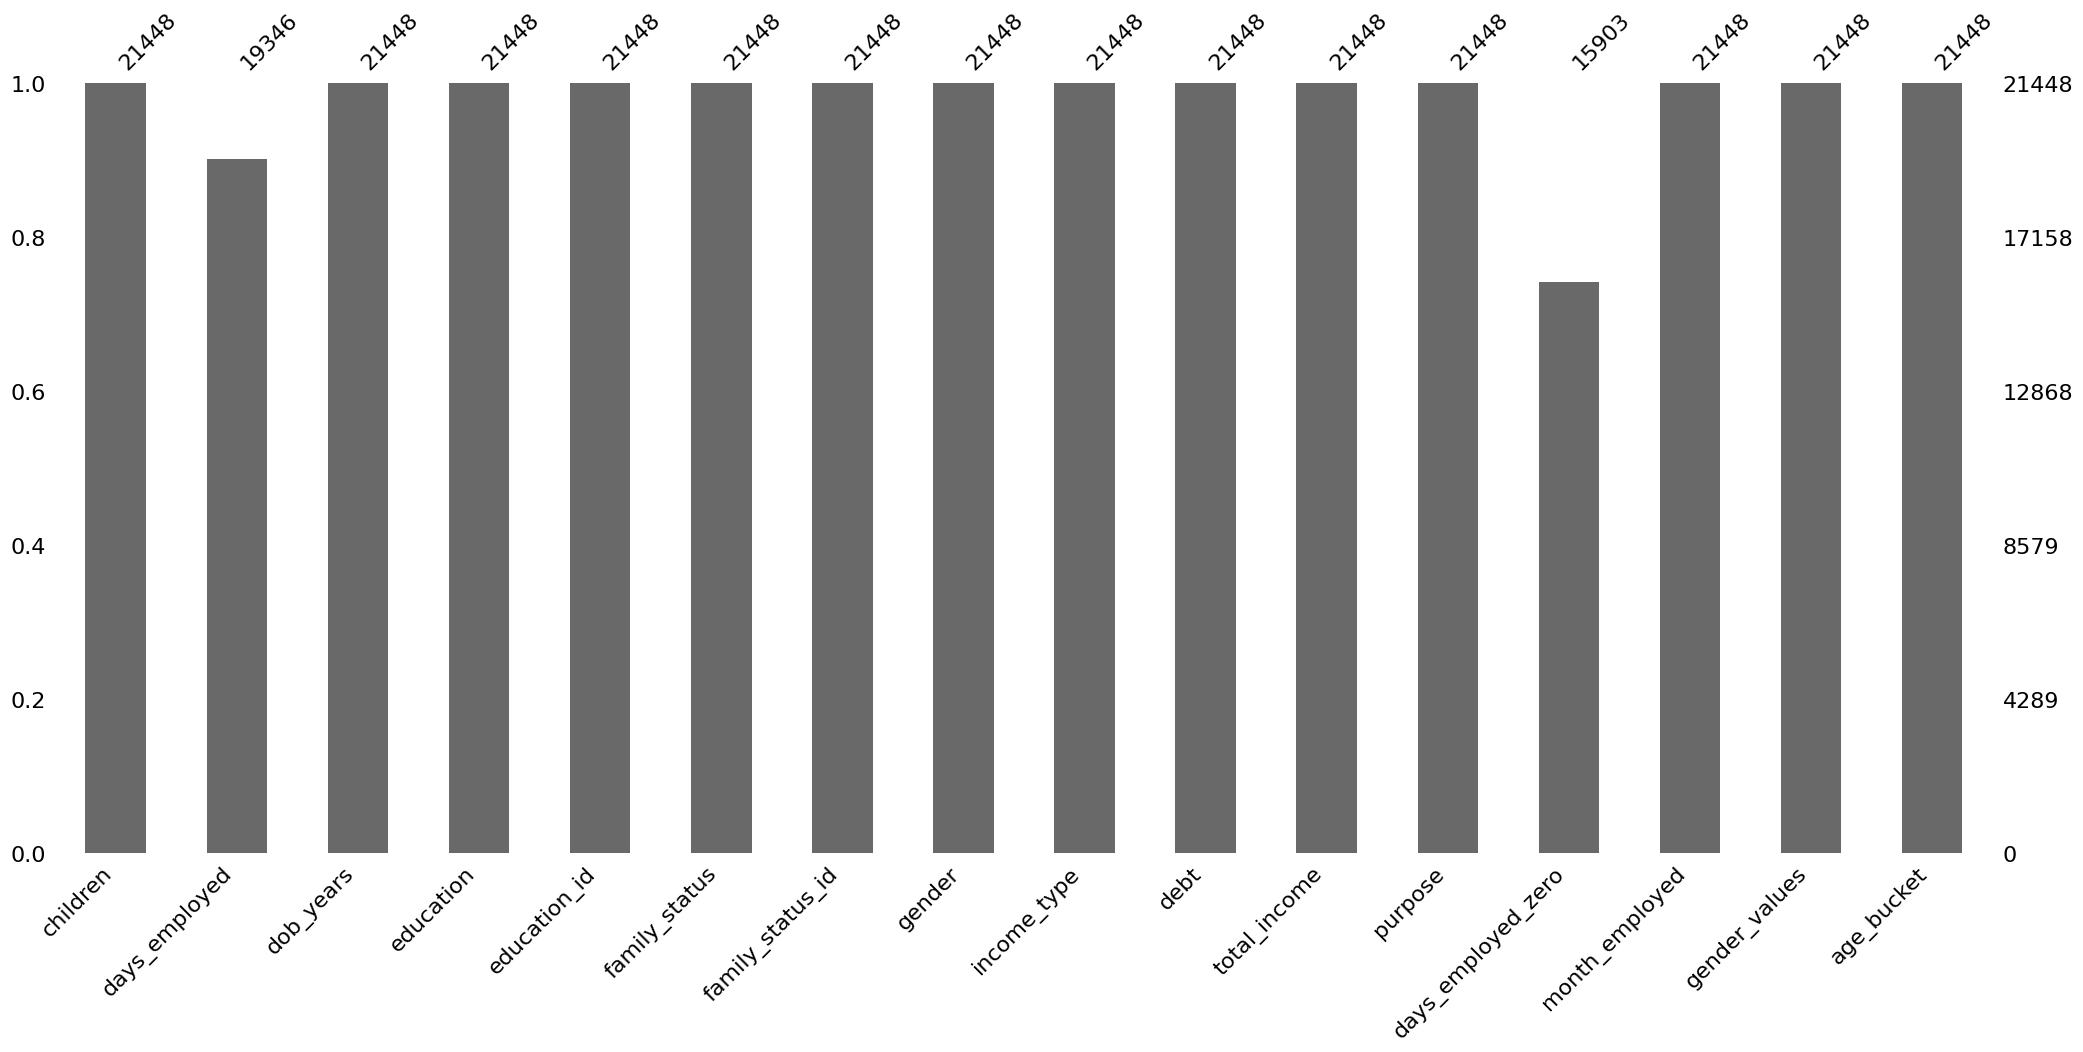

In [77]:
# Con este codigo podemos ver que total_income ya no tiene valores ausentes

msno.bar(credit_scoring_clean)

###  Restaurar valores en `days_employed`

In [78]:
# Verifiquemos si existen datos nulos en days_employed
print(credit_scoring_clean['days_employed_zero'].isnull().sum())

5545


Tal y como ocurrió con total_income, se trabajará con days_employed_zero, cuya columna contiene los valores ausentes originales más los valores ausentes nuevos que se originaron a partir de transformar los valores positivos a valores ausentes (se hizo tal transformación porque los valores positivos arrojaban valores irreales de alrededor de 1,000 años de trabajo por fila).

In [79]:
credit_scoring_clean['days_employed_zero'].fillna(credit_scoring_clean.groupby(['age_bucket', 'gender', 'income_type'])['days_employed_zero'].transform('median'),inplace=True)

In [80]:
credit_scoring_clean.isna().sum()

children                 0
days_employed         2102
dob_years                0
education                0
education_id             0
family_status            0
family_status_id         0
gender                   0
income_type              0
debt                     0
total_income             0
purpose                  0
days_employed_zero    3829
month_employed           0
gender_values            0
age_bucket               0
dtype: int64

Como se observa con el código de arriba, no se imputaron 3,829 datos ausentes de la columna days_employed_zero (como sí sucedió con el mismo código con la columna total_income). Se revisará entonces si la agrupación de las variables produce valores NaN.

In [81]:
credit_scoring_clean.groupby(by=['age_bucket', 'gender','income_type']).median()

# Como podemos observar, retiree genera valores ausentes y tal vez sea esa la razón para no imputar la totalidad de los 5,545 datos ausentes de la columna days_employed_zero.

children  days_employed  dob_years  \
age_bucket gender income_type                                         
30-39      F      business            1.0   -1589.693698       35.0   
                  civil servant       1.0   -2460.110419       35.0   
                  employee            1.0   -1620.468825       35.0   
                  retiree             1.0  364038.971624       38.0   
           M      business            1.0   -1460.520841       34.0   
                  civil servant       1.0   -2918.841060       34.0   
                  employee            1.0   -1425.957963       34.0   
                  retiree             0.0  368556.010382       36.0   
40-49      F      business            0.0   -1868.657079       44.0   
                  civil servant       0.0   -3593.891706       45.0   
                  employee            0.0   -2127.377230       44.0   
                  retiree             0.0  366620.400282       46.0   
           M      business            0.0   -1940.155190       44.0   
                  civil servant       0.0   -3641.191161       43.0   
                  employee            0.0   -1558.239667       44.0   
                  retiree             0.0  366777.226752       45.0   
50-59      F      business            0.0   -2249.036018       53.0   
                  civil servant       0.0   -4157.903924       53.0   
                  employee            0.0   -2468.057176       53.0   
                  retiree             0.0  365598.656507       56.0   
           M      business            0.0   -1618.911339       54.0   
                  civil servant       0.0   -3121.742237       54.0   
                  employee            0.0   -1912.523146       54.0   
                  retiree             0.0  359735.737909       56.0   
< 29       F      business            0.0    -900.333815       26.0   
                  civil servant       1.0   -1348.765084       27.0   
                  employee            0.0   -1072.042552       26.0   
                  retiree             0.0  350340.760224       26.5   
           M      business            0.0    -924.341870       26.0   
                  civil servant       0.0   -1390.910000       27.0   
                  employee            0.0    -951.099029       26.0   
                  retiree             0.0  370586.391585       26.5   
> 60       F      business            0.0   -2657.348903       62.0   
                  civil servant       0.0   -4032.142412       62.5   
                  employee            0.0   -3314.894331       62.0   
                  retiree             0.0  366544.996009       63.0   
           M      business            0.0   -2076.945002       62.0   
                  civil servant       0.0   -2921.757073       63.0   
                  employee            0.0   -1916.025667       62.0   
                  retiree             0.0  362556.360116       64.0   

                                 education_id  family_status_id  debt  \
age_bucket gender income_type                                           
30-39      F      business                1.0               0.0   0.0   
                  civil servant           1.0               0.0   0.0   
                  employee                1.0               0.0   0.0   
                  retiree                 1.0               1.0   0.0   
           M      business                1.0               0.0   0.0   
                  civil servant           1.0               0.0   0.0   
                  employee                1.0               0.0   0.0   
                  retiree                 1.0               1.0   0.0   
40-49      F      business                1.0               0.0   0.0   
                  civil servant           1.0               0.0   0.0   
                  employee                1.0               0.0   0.0   
                  retiree                 1.0               0.0   0.0   
           M      business  

In [82]:
credit_scoring_clean.groupby(by=['age_bucket', 'gender',]).median()

# Si eliminamos de la agrupamiento la columna income_type sí obtenemos resultados completos. 

children  days_employed  dob_years  education_id  \
age_bucket gender                                                     
30-39      F            1.0   -1640.454994       35.0           1.0   
           M            1.0   -1480.191192       34.0           1.0   
40-49      F            0.0   -2080.471069       44.0           1.0   
           M            0.0   -1694.758705       44.0           1.0   
50-59      F            0.0    -553.913054       54.0           1.0   
           M            0.0   -1352.205266       54.0           1.0   
< 29       F            0.0   -1038.140479       26.0           1.0   
           M            0.0    -955.608139       26.0           1.0   
> 60       F            0.0  357494.994944       63.0           1.0   
           M            0.0  345143.826720       63.0           1.0   

                   family_status_id  debt  total_income  days_employed_zero  \
age_bucket gender                                                             
30-39      F                    0.0   0.0    21822.6730         1620.468825   
           M                    0.0   0.0    27697.3810         1440.081777   
40-49      F                    0.0   0.0    22153.1815         2127.377230   
           M                    0.0   0.0    27691.3825         1682.461250   
50-59      F                    0.0   0.0    21240.7795         2468.057176   
           M                    0.0   0.0    25017.6360         1912.523146   
< 29       F                    1.0   0.0    20091.7600         1072.042552   
           M                    1.0   0.0    25615.5090          951.099029   
> 60       F                    1.0   0.0    18475.6330         3314.894331   
           M                    0.0   0.0    21208.9710         1922.074700   

                   month_employed  gender_values  
age_bucket gender                                 
30-39      F                  1.0            2.0  
           M                  1.0            1.0  
40-49      F                  0.0            2.0  
           M                  0.0            1.0  
50-59      F                  0.0            2.0  
           M                  0.0            1.0  
< 29       F                  0.0            2.0  
           M                  0.0            1.0  
> 60       F                  0.0            2.0  
           M                  0.0            1.0

In [83]:
# Pasemos entonces el código inicial para la transformación, pero ahora eliminando la columna income_type del agrupamiento

credit_scoring_clean['days_employed_zero'].fillna(credit_scoring_clean.groupby(['age_bucket', 'gender'])['days_employed_zero'].transform('median'),inplace=True)

In [84]:
credit_scoring_clean.describe(include='all')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,days_employed_zero,month_employed,gender_values,age_bucket
count,21448.000000,19346.000000,21448.000000,21448,21448.000000,21448,21448.000000,21448,21448,21448.000000,21448.000000,21448,21448.000000,21448.000000,21448.000000,21448
unique,NaN,NaN,NaN,5,NaN,5,NaN,2,4,NaN,NaN,38,NaN,NaN,NaN,5
top,NaN,NaN,NaN,secondary education,NaN,married,NaN,F,employee,NaN,NaN,wedding ceremony,NaN,NaN,NaN,30-39
freq,NaN,NaN,NaN,15170,NaN,12336,NaN,14172,11084,NaN,NaN,791,NaN,NaN,NaN,5660
mean,0.480558,63025.139321,43.475476,NaN,0.817232,NaN,0.973890,NaN,NaN,0.081080,26452.361123,NaN,2371.687471,0.480558,1.660761,NaN
std,0.756067,140809.128176,12.213074,NaN,0.548635,NaN,1.421569,NaN,NaN,0.272964,15724.599760,NaN,2017.491371,0.756067,0.473462,NaN
min,0.000000,-18388.949901,19.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,0.000000,3306.762000,NaN,24.141633,0.000000,1.000000,NaN
25%,0.000000,-2747.486276,33.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,17220.747750,NaN,993.801450,0.000000,1.000000,NaN
50%,0.000000,-1203.637301,43.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,23025.719000,NaN,1922.074700,0.000000,2.000000,NaN
75%,1.000000,-291.146144,53.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000,31546.624000,NaN,3299.304446,1.000000,2.000000,NaN


<AxesSubplot: >

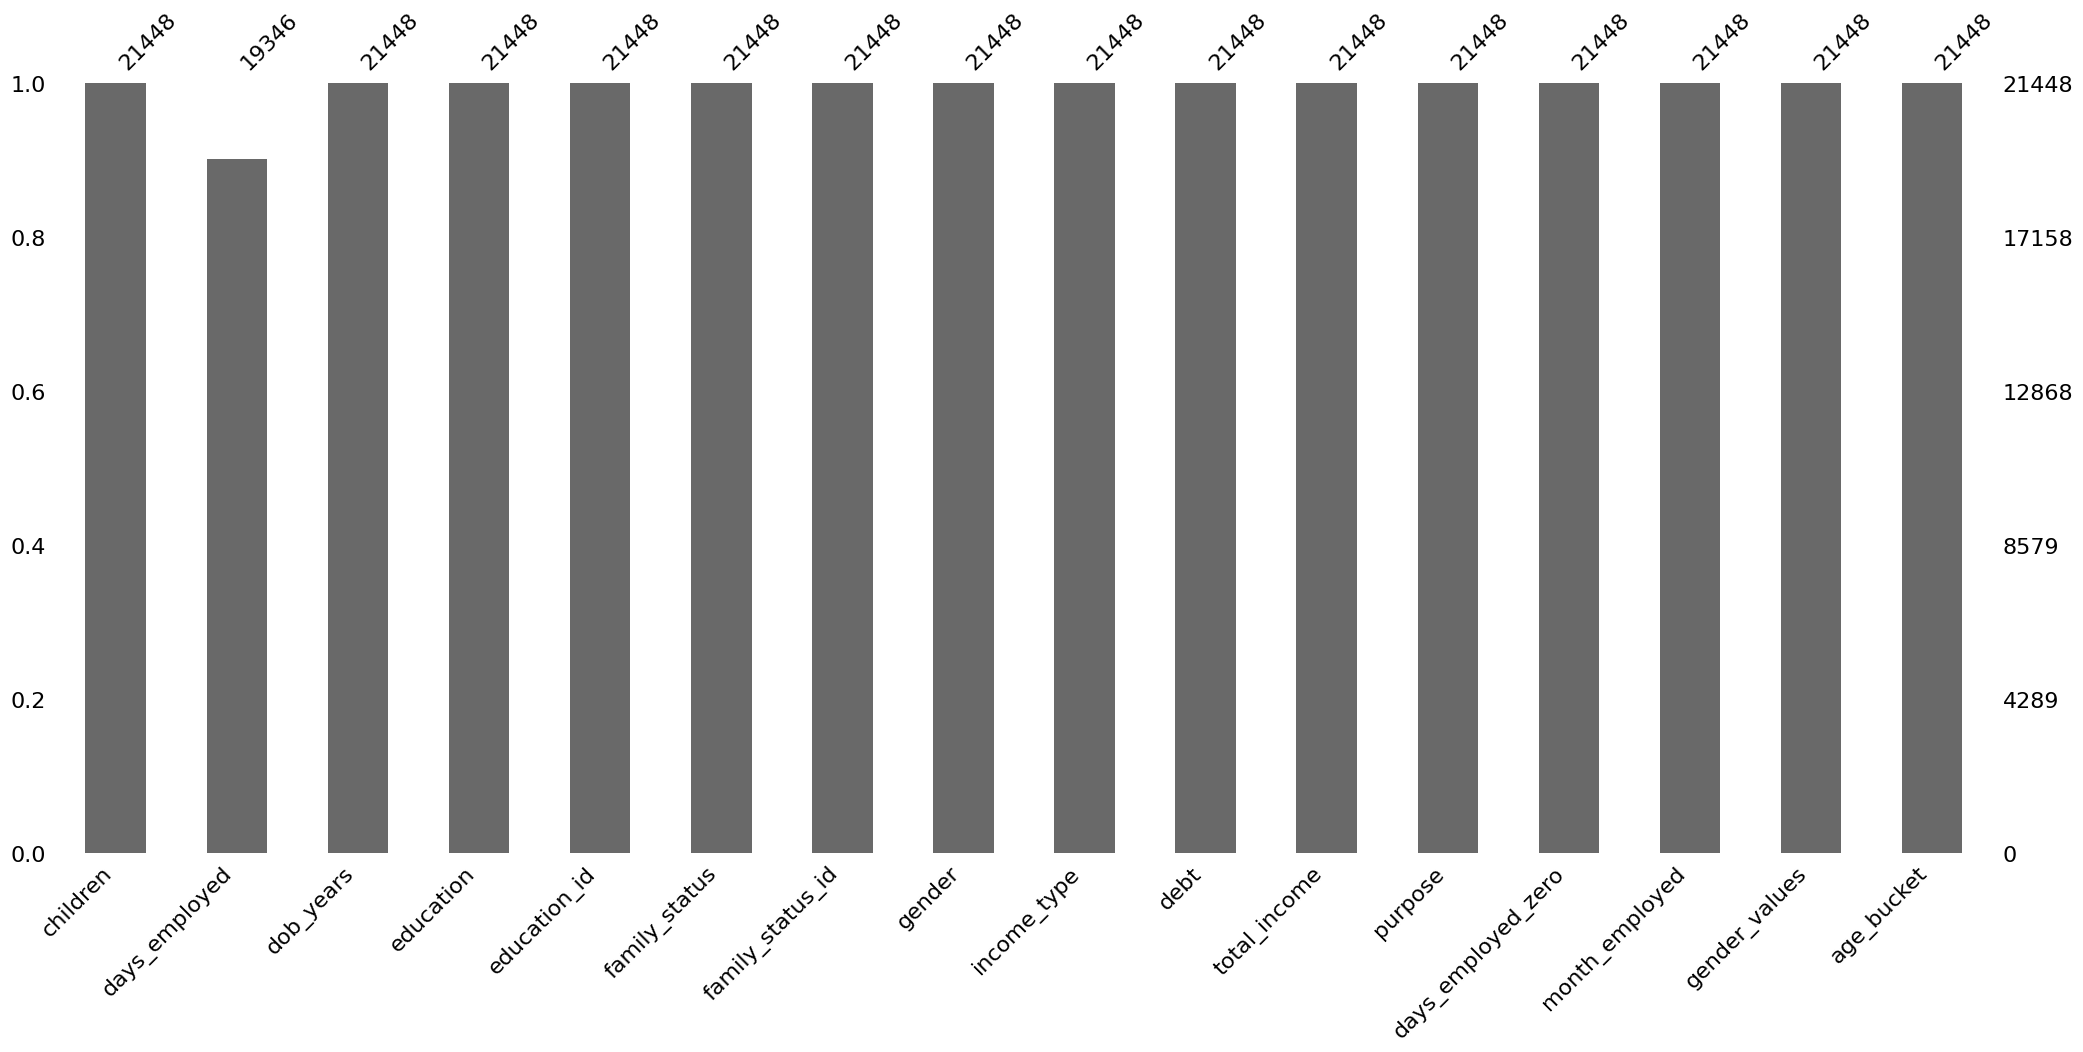

In [85]:
# Revisemos los valores de las columnas
msno.bar(credit_scoring_clean)

Como se observa en el gráfico de arriba, ya todo los valores se encuentras sin valores ausentes y limpios (la columna days_employed aparece con un número menor, pero ya se sustituyó por days_employed_zero).

## Parte 4. Clasificación de datos

En este apartado comenzaremos a clasificar los datos, con la finalidad de responder a las preguntas y probar las diferentes hipótesis de este proyecto.

In [86]:
# Muestra los valores de los datos seleccionados para la clasificación

print(credit_scoring_clean.head(20))


    children  days_employed  dob_years            education  education_id  \
0          1   -8437.673028         42    bachelor's degree             0   
1          1   -4024.803754         36  secondary education             1   
2          0   -5623.422610         33  secondary education             1   
3          3   -4124.747207         32  secondary education             1   
4          0  340266.072047         53  secondary education             1   
5          0    -926.185831         27    bachelor's degree             0   
6          0   -2879.202052         43    bachelor's degree             0   
7          0    -152.779569         50  secondary education             1   
8          2   -6929.865299         35    bachelor's degree             0   
9          0   -2188.756445         41  secondary education             1   
10         2   -4171.483647         36    bachelor's degree             0   
11         0    -792.701887         40  secondary education             1   

In [87]:
print(credit_scoring_clean['purpose'].unique())

['purchase of the house' 'car purchase' 'supplementary education'
 'to have a wedding' 'housing transactions' 'education' 'having a wedding'
 'purchase of the house for my family' 'buy real estate'
 'buy commercial real estate' 'buy residential real estate'
 'construction of own property' 'property' 'building a property'
 'buying a second-hand car' 'buying my own car'
 'transactions with commercial real estate' 'building a real estate'
 'housing' 'transactions with my real estate' 'cars' 'to become educated'
 'second-hand car purchase' 'getting an education' 'car'
 'wedding ceremony' 'to get a supplementary education'
 'purchase of my own house' 'real estate transactions'
 'getting higher education' 'to own a car' 'purchase of a car'
 'profile education' 'university education'
 'buying property for renting out' 'to buy a car' 'housing renovation'
 'going to university']


Como se observa con los valores únicos de la columna **purpose**, existen numerosas respuestas únicas. Por lo tanto, se crearán categorías generales para agrupar dichos datos:

- **House**: incluirá todas las razones relacionadas con la compra o construcción de una casa o propiedad.

- **Car**: agrupará todas las razones que contengan la palabra "carro" (coche, automóvil, vehículo, etc.).

- **Education**: abarcará todas las razones que contengan las palabras "education" o "educated" (educación, estudios, formación, etc.).

- **Wedding**: englobará todas las razones que contengan la palabra "wedding" (boda, matrimonio, casamiento, etc.).

- **Real estate**: reunirá todas las razones que contengan las palabras "real estate" y "buying property for renting out" (bienes raíces, compra de propiedades para alquilar, etc.). Se decidió colocar esta última razón en esta categoría porque, en la categoría "House", se incluyen aquellas razones relacionadas con la adquisición de una casa propia, mientras que en la categoría "Real estate" se agrupan las razones vinculadas a negocios de bienes raíces, que incluyen el alquiler de propiedades.


In [88]:
# Cambiaremos entonces los datos de purpose para agruparlos en grandes categorías

def rename_purpose(purpose):
    if purpose == 'having a wedding' or purpose == 'to have a wedding' or purpose == 'wedding ceremony':
        return 'wedding'
    elif purpose == 'purchase of the house' or purpose ==  'housing transactions' or purpose == 'purchase of the house for my family' or purpose ==  'construction of own property' or purpose == 'property' or purpose == 'building a property' or purpose ==  'housing' or purpose == 'purchase of my own house' or purpose ==  'housing renovation':
        return 'house'
    elif purpose == 'car purchase' or purpose == 'buying my own car' or purpose == 'buying a second-hand car' or purpose == 'cars' or purpose == 'second-hand car purchase' or purpose == 'car' or purpose == 'to own a car' or purpose == 'purchase of a car' or purpose == 'to buy a car':
        return 'car'
    elif purpose == 'supplementary education' or purpose == 'education' or purpose == 'to become educated' or purpose == 'getting an education' or purpose == 'to get a supplementary education' or purpose == 'getting higher education' or purpose == 'profile education' or purpose == 'university education' or purpose == 'going to university':
        return 'education'
    else:
        return 'real estate'  

credit_scoring_clean['category_purpose'] = credit_scoring_clean['purpose'].apply(rename_purpose)

print(credit_scoring_clean['category_purpose'].value_counts())

house          5694
real estate    5113
car            4305
education      4013
wedding        2323
Name: category_purpose, dtype: int64


Hasta este momento todos los datos se encuentra agrupados en grandes categorías, el único dato a resolver cómo trabajarlo es el total_income.

In [89]:
print(credit_scoring_clean['total_income'].describe())

count     21448.000000
mean      26452.361123
std       15724.599760
min        3306.762000
25%       17220.747750
50%       23025.719000
75%       31546.624000
max      362496.645000
Name: total_income, dtype: float64


Debido al valor extremo encontrado de 362,496 se decidió trabajar con la mediana para hacer las agrupaciones en este orden: menos de 19,999, de 20,000-29,999,
de 30,000 a 39,999, de 40,000 a 49,999, y 50,000 y más.


In [90]:
#Función para asignar la nueva categoría según el ingreso

def income_bucket(x):
    if x < 19999 :
        return '< 19,999'
    elif x < 29999:
        return '20,000-29,999'
    elif x < 39999:
        return '30,000-39,999'
    elif x < 49999:
        return '40,000-49,999'
    else:
        return '> 50,000'  

credit_scoring_clean['income_bucket'] = credit_scoring_clean['total_income'].apply(income_bucket)

print(credit_scoring_clean['income_bucket'].value_counts())

< 19,999         7809
20,000-29,999    7560
30,000-39,999    3268
40,000-49,999    1492
> 50,000         1319
Name: income_bucket, dtype: int64


In [91]:
# Y así terminamos la imputación de valores

credit_scoring_clean.describe(include='all')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,days_employed_zero,month_employed,gender_values,age_bucket,category_purpose,income_bucket
count,21448.000000,19346.000000,21448.000000,21448,21448.000000,21448,21448.000000,21448,21448,21448.000000,21448.000000,21448,21448.000000,21448.000000,21448.000000,21448,21448,21448
unique,NaN,NaN,NaN,5,NaN,5,NaN,2,4,NaN,NaN,38,NaN,NaN,NaN,5,5,5
top,NaN,NaN,NaN,secondary education,NaN,married,NaN,F,employee,NaN,NaN,wedding ceremony,NaN,NaN,NaN,30-39,house,"< 19,999"
freq,NaN,NaN,NaN,15170,NaN,12336,NaN,14172,11084,NaN,NaN,791,NaN,NaN,NaN,5660,5694,7809
mean,0.480558,63025.139321,43.475476,NaN,0.817232,NaN,0.973890,NaN,NaN,0.081080,26452.361123,NaN,2371.687471,0.480558,1.660761,NaN,NaN,NaN
std,0.756067,140809.128176,12.213074,NaN,0.548635,NaN,1.421569,NaN,NaN,0.272964,15724.599760,NaN,2017.491371,0.756067,0.473462,NaN,NaN,NaN
min,0.000000,-18388.949901,19.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,0.000000,3306.762000,NaN,24.141633,0.000000,1.000000,NaN,NaN,NaN
25%,0.000000,-2747.486276,33.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,17220.747750,NaN,993.801450,0.000000,1.000000,NaN,NaN,NaN
50%,0.000000,-1203.637301,43.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,23025.719000,NaN,1922.074700,0.000000,2.000000,NaN,NaN,NaN
75%,1.000000,-291.146144,53.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000,31546.624000,NaN,3299.304446,1.000000,2.000000,NaN,NaN,NaN


## Parte 5. Comprobación de las hipótesis


Por último, se comprobarán las hipótesis entre algunas variables y el pagar a tiempo el crédito. Se asume el valor 0 debt como "sí pagó" y el 1 como "no pagó" con respecto a la liquidación de créditos anteriores.

**¿Existe una correlación entre tener hijos y pagar a tiempo?**

In [92]:
pd.crosstab(index=credit_scoring_clean['children'], columns=credit_scoring_clean['debt'], normalize='index')

debt,0,1
children,,
0,0.924540,0.075460
1,0.908529,0.091471
2,0.905501,0.094499
3,0.918182,0.081818
4,0.902439,0.097561
5,1.000000,0.000000


**Conclusión**

Como se observa en la tabla dinámica, por número de niños siempre el porcentaje fue alto de la gente que con anterioridad no incumplió alguna vez un préstamo. Para el caso de aquellas personas con 5 hijos el 100% siempre cumplió con un préstamo.

**¿Existe una correlación entre la situación familiar y el pago a tiempo?**

In [93]:
# Comprueba los datos del estado familiar y los pagos a tiempo
pd.crosstab(index=credit_scoring_clean['family_status'], columns=credit_scoring['debt'], normalize='index')


debt,0,1
family_status,,
civil partnership,0.917088,0.082912
divorced,0.931323,0.068677
married,0.919565,0.080435
unmarried,0.915568,0.084432
widow,0.924922,0.075078


**Conclusión**

Como se observa en la tabla resultante, más del 90% de todas las categorias de estatus familiar no han incumplido con un crédito, el porcentaje más alto de incumplimiento fue del 8.4% de las personas solteras.

**¿Existe una correlación entre el nivel de ingresos y el pago a tiempo?**

In [94]:
# Comprueba los datos del nivel de ingresos y los pagos a tiempo
pd.crosstab(index=credit_scoring_clean['income_bucket'], columns=credit_scoring['debt'], normalize='index')

# Calcular la tasa de incumplimiento basada en el nivel de ingresos

debt,0,1
income_bucket,,
"20,000-29,999",0.915972,0.084028
"30,000-39,999",0.917687,0.082313
"40,000-49,999",0.920912,0.079088
"< 19,999",0.923146,0.076854
"> 50,000",0.920334,0.079666


La gente con ingresos entre 20,000 y 49,999 tiene un adeudo de pago de crédito de alrededor del 8.3% (los otros grupos de edad tuvieron menos impago).

In [95]:
pd.crosstab(index=credit_scoring_clean['gender'], columns=credit_scoring['debt'], normalize='index')


debt,0,1
gender,,
F,0.921237,0.078763
M,0.915991,0.084009


Las mujeres son mejores cumpliendo con sus créditos.

In [96]:
pd.crosstab(index=credit_scoring_clean['income_type'], columns=credit_scoring['debt'], normalize='index')


debt,0,1
income_type,,
business,0.915895,0.084105
civil servant,0.929897,0.070103
employee,0.916343,0.083657
retiree,0.929224,0.070776


Los datos son buenos con respecto al pago del crédito (más del 91% de cumplimiento) en los tres tipos de tipos de ingresos según actividad.

In [97]:
pd.crosstab(index=credit_scoring_clean['age_bucket'], columns=credit_scoring['debt'], normalize='index')


debt,0,1
age_bucket,,
30-39,0.917830,0.082170
40-49,0.915108,0.084892
50-59,0.922647,0.077353
< 29,0.910922,0.089078
> 60,0.937550,0.062450


Los menos de 29 años tiene una incumplimiento del pago del 8.9% versus el 6.2% de los mayores de 60 años.

In [98]:
pd.crosstab(index=credit_scoring_clean['category_purpose'], columns=credit_scoring_clean['debt'], normalize='index')


debt,0,1
category_purpose,,
car,0.906620,0.093380
education,0.907800,0.092200
house,0.930804,0.069196
real estate,0.924311,0.075689
wedding,0.919931,0.080069


Aquellos que solicitaron un crédito con la finalidad de comprar un carro fueron los que más incumplieron al pagar un crédito (9.3%) seguidos de los que lo solicitaron por educación (9.2%).

In [99]:
pd.crosstab(index=credit_scoring_clean['education'], columns=credit_scoring_clean['debt'], normalize='index')

debt,0,1
education,,
bachelor's degree,0.947007,0.052993
graduate degree,1.000000,0.000000
primary education,0.890071,0.109929
secondary education,0.910218,0.089782
some college,0.908602,0.091398


Aquellos con educación primaria fueron los que más incumplieron el pago de un crédito de entre todas las demás categorías (casi 11%), en contraste, aquellos con licenciatura siempre pagaron a tiempo.

In [100]:
credit_scoring_clean_corr = credit_scoring_clean.corr(method='spearman')
credit_scoring_clean_corr

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income,days_employed_zero,month_employed,gender_values
children,1.000000,-0.146591,-0.342699,-0.037127,-0.155803,0.027956,0.036525,-0.106269,1.000000,-0.046486
days_employed,-0.146591,1.000000,0.220623,0.063232,0.076847,0.018345,-0.146687,-0.548669,-0.146591,0.047401
dob_years,-0.342699,0.220623,1.000000,0.073762,-0.043720,-0.071896,-0.084788,0.397978,-0.342699,0.136049
education_id,-0.037127,0.063232,0.073762,1.000000,0.013552,0.056584,-0.180047,0.013907,-0.037127,-0.023603
family_status_id,-0.155803,0.076847,-0.043720,0.013552,1.000000,0.023643,-0.017031,-0.053750,-0.155803,0.066479
debt,0.027956,0.018345,-0.071896,0.056584,0.023643,1.000000,-0.007625,-0.077677,0.027956,-0.056305
total_income,0.036525,-0.146687,-0.084788,-0.180047,-0.017031,-0.007625,1.000000,-0.021130,0.036525,-0.229114
days_employed_zero,-0.106269,-0.548669,0.397978,0.013907,-0.053750,-0.077677,-0.021130,1.000000,-0.106269,0.165470
month_employed,1.000000,-0.146591,-0.342699,-0.037127,-0.155803,0.027956,0.036525,-0.106269,1.000000,-0.046486
gender_values,-0.046486,0.047401,0.136049,-0.023603,0.066479,-0.056305,-0.229114,0.165470,-0.046486,1.000000


Si revisamos la correlación entre columnas, no existe una fuerte correlación positiva entre debt, la más alta fue la de educación con 0.05.


<AxesSubplot: >

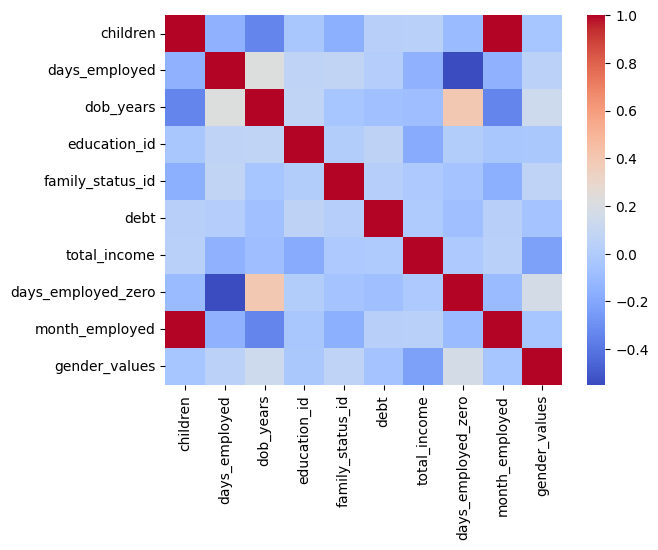

In [101]:
sns.heatmap(credit_scoring_clean_corr,
            xticklabels=credit_scoring_clean_corr,
            yticklabels=credit_scoring_clean_corr,
            cmap='coolwarm'
            )

**Conclusión**

En conclusión, al analizar las variables relacionadas con la solicitud y el pago de créditos, no se encontró una correlación significativa. La única variable que mostró un porcentaje de incumplimiento de pago de créditos superior al 10% fue el estado civil de ser soltero. Todas las demás variables analizadas presentaron porcentajes de incumplimiento inferiores a esa cifra.

Estos resultados sugieren que el estado civil de ser soltero puede ser un factor relevante en la capacidad de pago de un préstamo. Sin embargo, se requiere de un análisis más detallado y la consideración de otras variables para comprender completamente los factores que influyen en el cumplimiento de los pagos de préstamos.

Es importante tener en cuenta que esta conclusión se basa en el análisis realizado hasta el momento y puede estar sujeta a cambios o refinamientos a medida que se realicen análisis adicionales o se consideren otras variables relevantes.



# Conclusión general

El proyecto tuvo la finalidad de apoyar en crear una puntuación de crédito para un cliente potencial. También fue de interés conocer si existe relación entre tener hijos, el estado civil y el nivel de ingresos para pagar a tiempo un préstamo.

La primera parte se inició con la exploración del dataframe, se analizó cada columna a partir de sus datos estadísticos y del propio conjunto a través del método `info()`. A través de `isnull().sum()`, `nunique()`, `isna().sum()`, `value_counts()` se observó con más detalle las singularidades de cada columna y se decidió realizar lo siguiente con los valores ausentes dentro del dataframe:
- Las columnas 'days_employed' y 'total_income' presentaron valores ausentes en ambas y en las mismas filas, es decir, cada vez que faltó el dato en 'days_employed' también siempre faltó en 'total_income'. 

La segunda parte fue la transformación de datos, se repasó cada columna para identificar las posibles problemáticas con cada uno de sus datos y categorías; se hicieron las siguientes transformaciones en las columnas:
- 'education': existían 15 datos únicos y, como tal se intuyó en la parte uno, existían tres maneras de escribir el grado escolar del cliente, por lo que se unificó todo a minúsculas y se obtuvieron 5 columnas únicamente.
- 'children': había dos datos que generaron ruido y los cuales se modificaron, así, el 20 pasó a ser 2 y el -1 a 1. El primero debido a que eran 67 filas con el dato 20 (versus 34 filas con 4 hijos y 8 con 5 hijos) por lo que no se encontró lógica a tal situación (ya que lo que se esperó fue una disminución gradual en el número de hijos) y por lo tanto se modificó. Con el -1 se entendió que fue error de captura.
- 'days_employed': se hizo un `describe()` de esta columna y se observó que los datos en negativo fueron más coherentes que los positivos (había datos con 1,000 años de trabajo), por esto, se transformaron los valores positivos (que fueron alrededor del 25% del total de la columna) a valores ausentes, posteriormente los negativos y los nuevos ausentes se convirtieron a positivos. Una vez que se realizó la conversión, se creó una nueva fila denominada 'month_employed' para tener los días transformados en años redondeados.
- 'dob_years': se identificó un 0 dentro de los valores únicos, por lo que se eliminó y se sustituyó por la media (29 años) debido a que no había valores extremos (y por lo tanto no era necesario usar la mediana).
- 'family_status': no existieron datos problemáticos, únicamente se decidió cambiar el nombre de la categoría 'widow / widower' a 'widow' para la mejor manipulación de datos en el futuro.
- 'gender': únicamente existió un dato erróneo 'XNA' dentro de esta columna, y debido a que los valores de mujeres eran casi el doble de mujeres al de hombres se decidió transformarlo a 'F'.
- 'income_type': de inicio fueron 6 categorías las presentes, pero 3 de ellas solo tenían un dato, por lo que las tres se transformaron a 'employee' debido a que esta categoría representó el 63% del total de esta columna.
- 'debt': se identificó que el porcentaje mayor fue 0 por lo que se supuso que este dato era para asignar a la persona como que no incumplió con un crédito, mientras que el 1 fue que sí incumplió, esto debido a que esperas que el banco no tenga cartera vencida en pagos por lo que esperas un porcentaje alto de personas al corriente de su crédito versus los que no cumplieron con el pago de su crédito.

En la parte 3 se continuó trabajando en la transformación de los datos, se rellenaron los valores ausentes de `income_type` y `days_employed`.

En la siguiente parte se realizaron cinco nuevas categorías que agruparan los 38 datos sobre los motivos de solicitud del crédito, así la columna 'category_purpose' está formada por *house*, *real estate*, *car*, *education* y *wedding*. También se realizó un ejercicio similar con el ingreso y se creó una nueva categoría 'income_bucket' para agrupar los ingresos.

Por último, se crearon tablas dinámicas para correlacionar una columna con características del cliente con `debt` para poder identificar dónde existieron datos altos en el incumplimiento del crédito. Al final, cuando se revisó tabla por tabla, se identificó que aquellos que tuvieron arriba del 10% de incumplimiento fueron aquellas personas *solteras*, *hombres*, de *29 años y menores*, que solicitaron un crédito para *comprar un carro*, y con *educación primaria*.
